In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')




In [ ]:
! unzip ML_Ops_data.zip

### EDA Functions

In [ ]:
def CustomInfo(df):
  for col in df.columns:
    print(f'{col},  dtype: {df[col].dtype} null_values = {df[col].isnull().sum()}')

In [ ]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(2)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns


In [ ]:
def seperate_cols(df, cnum_threshold):
   num_cols = [col for col in df.columns if df[col].dtype != 'O']
   cnum_cols = [col for col in num_cols if len(df[col].unique()) > cnum_threshold]
   dnum_cols = [col for col in num_cols if col not in cnum_cols]
   cat_cols = [col for col in df.columns if df[col].dtype == 'object']
   return num_cols, cnum_cols, dnum_cols, cat_cols

In [ ]:
def Lookup(df):

  print(df.shape)
  print(df.info())
  print(df.head())


In [ ]:
import pandas as pd

def null_value_info(df):
    """
    Prints the number of null values and percentage of null values for each column in the dataframe.
    """
    nulls = df.isnull().sum()
    null_percentage = (df.isnull().sum() / len(df)) * 100
    null_info = pd.DataFrame({
        'Null Values': nulls,
        'Percentage Null': null_percentage
    })

    # Sort by percentage of null values
    null_info = null_info[null_info['Null Values'] > 0].sort_values(by='Percentage Null', ascending=False)

    if null_info.empty:
        print("No null values in the dataset.")
    else:
        print(null_info)

# Example usage
# null_value_info(sales_masterdata)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots(df):
    """
    Plots boxplots for all numerical columns in the dataframe.
    """
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df_num = df[num_cols]

    # Creating boxplots for each numerical column
    plt.figure(figsize=(20, 10))
    for i, col in enumerate(df_num.columns, 1):
        plt.subplot(5, 4, i)  # Adjust depending on the number of plots needed
        sns.boxplot(y=col, data=df_num)
        plt.title(f'Boxplot of {col}')
        plt.tight_layout()

    plt.show()

# Example usage
# plot_boxplots(sales_masterdata)


In [ ]:
def plot_pairplot(df):
    """
    Creates a pairplot for all numerical columns.
    """
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    sns.pairplot(df[num_cols])
    plt.show()

# Example usage
# plot_pairplot(sales_masterdata)


In [ ]:
def plot_countplots(df):
    """
    Plots countplots for all categorical columns.
    """
    cat_cols = df.select_dtypes(include=['object']).columns

    # Creating countplots for each categorical column
    plt.figure(figsize=(20, 10))
    for i, col in enumerate(cat_cols, 1):
        plt.subplot(3, 4, i)  # Adjust based on the number of categorical features
        sns.countplot(x=col, data=df)
        plt.title(f'Countplot of {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()

    plt.show()

# Example usage
# plot_countplots(sales_masterdata)


In [ ]:
def plot_correlation_heatmap(df):
    """
    Plots a heatmap of the correlation between numerical columns.
    """
    plt.figure(figsize=(12, 8))
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap of Numerical Columns')
    plt.show()

# Example usage
# plot_correlation_heatmap(sales_masterdata)


In [ ]:
def summarize_statistics(df):
    """
    Prints a summary of basic statistics for all numerical columns in the dataframe.
    """
    summary = df.describe().transpose()
    print(summary)

# Example usage
# summarize_statistics(sales_masterdata)


In [ ]:
def plot_distribution(df):
    """
    Plots distribution plots (histograms) for all numerical columns in the dataframe.
    """
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns

    plt.figure(figsize=(20, 10))
    for i, col in enumerate(num_cols, 1):
        plt.subplot(3, 4, i)  # Adjust the number of rows/cols based on number of features
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.tight_layout()

    plt.show()

# Example usage
# plot_distribution(sales_masterdata)


In [ ]:
def visualize_outliers(df):
    """
    Visualizes outliers in the dataset using boxplots for numerical columns.
    """
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns

    plt.figure(figsize=(20, 10))
    for i, col in enumerate(num_cols, 1):
        plt.subplot(3, 4, i)  # Adjust based on the number of features
        sns.boxplot(x=df[col])
        plt.title(f'Outliers in {col}')
        plt.tight_layout()

    plt.show()

# Example usage
# visualize_outliers(sales_masterdata)


In [ ]:
def EDA(df):

   print(df.head())

   print("*** Info *****")

   print(df.info())

   print("\n*** Missing Values *****")

   missing_values_table(df)

   print("\n*** Plots *****")

   num_cols, cnum_cols, dnum_cols, cat_cols = seperate_cols(df, 10)

   print('\n **** Histogram ****')

   plot_distribution(df)

   print('\n **** Boxplot ****')

   plot_boxplots(df)

   print('\n **** Pairplot ****')

   plot_pairplot(df)

   print('\n **** Countplot ****')

   plot_countplots(df)

   print('\n **** Correlation Heatmap ****')

   plot_correlation_heatmap(df)

   print('\n **** Summary Statistics ****')

   summarize_statistics(df)

   print('\n **** Outliers ****')

   visualize_outliers(df)





### Folder Setup

In [ ]:
import os

folder_path = os.path.join('/content/PS_DATA', 'Prepared from Raw')

# Specify the CSV file name
file_name = 'Bill_Settlement_Report.csv'

# Combine the folder path and file name to get the full file path
file_path = os.path.join(folder_path, file_name)

# Read the CSV file
billSet= pd.read_csv(file_path)

### Bill Settlements

In [ ]:
billSet.head()

,Order_Type,Invoice_No_,Date,Biller,Status,Order_Total,Settled_Total,First_Print_Date,Last_Settlement_Date,Duration__In_Minutes_,Settlement_Counter,Settled_By
0,Delivery(Parcel),403,2024-04-07 23:51:33+00:00,Autoaccept (Autoaccept),Not Settled,495,NaN,2024-04-07 23:51:33+00:00,NaN,NaN,NaN,NaN
1,Dine In,709,2024-05-12 20:58:44+00:00,UMESH BAR (UMESH BAR),Settled,634,634.0,2024-05-12 20:58:44+00:00,2024-05-12 22:13:43,74.0,Billing Station,vijay (vijay shetty)
2,Dine In,815,2024-05-21 00:37:09+00:00,UMESH BAR (UMESH BAR),Settled,4460,4460.0,2024-05-21 00:37:10+00:00,2024-05-21 00:51:56,14.0,Billing Station,vijay (vijay shetty)
3,Dine In,98,2024-04-07 21:44:20+00:00,UMESH BAR (UMESH BAR),Settled,380,380.0,2024-04-07 21:44:20+00:00,2024-04-07 21:50:37,6.0,Billing Station,vijay (vijay shetty)
4,Dine In,123,2024-04-03 22:59:20+00:00,UMESH BAR (UMESH BAR),Settled,3473,3473.0,2024-04-03 22:59:23+00:00,2024-04-03 23:05:18,5.0,client,vijay (vijay shetty)


In [ ]:
billSet.shape

(3966, 12)

In [ ]:
billSet.info() # Clean Enough -> Drop Na

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3966 entries, 0 to 3965
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Order_Type             3966 non-null   object 
 1   Invoice_No_            3966 non-null   int64  
 2   Date                   3966 non-null   object 
 3   Biller                 3966 non-null   object 
 4   Status                 3966 non-null   object 
 5   Order_Total            3966 non-null   int64  
 6   Settled_Total          3965 non-null   float64
 7   First_Print_Date       3966 non-null   object 
 8   Last_Settlement_Date   3965 non-null   object 
 9   Duration__In_Minutes_  3965 non-null   float64
 10  Settlement_Counter     3965 non-null   object 
 11  Settled_By             3965 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 371.9+ KB


         Order_Type  Invoice_No_                       Date                   Biller       Status  Order_Total  Settled_Total           First_Print_Date Last_Settlement_Date  Duration__In_Minutes_ Settlement_Counter            Settled_By
0  Delivery(Parcel)          403  2024-04-07 23:51:33+00:00  Autoaccept (Autoaccept)  Not Settled          495            NaN  2024-04-07 23:51:33+00:00                  NaN                    NaN                NaN                   NaN
1           Dine In          709  2024-05-12 20:58:44+00:00    UMESH BAR (UMESH BAR)      Settled          634          634.0  2024-05-12 20:58:44+00:00  2024-05-12 22:13:43                   74.0    Billing Station  vijay (vijay shetty)
2           Dine In          815  2024-05-21 00:37:09+00:00    UMESH BAR (UMESH BAR)      Settled         4460         4460.0  2024-05-21 00:37:10+00:00  2024-05-21 00:51:56                   14.0    Billing Station  vijay (vijay shetty)
3           Dine In           98  2024-04-07 21:

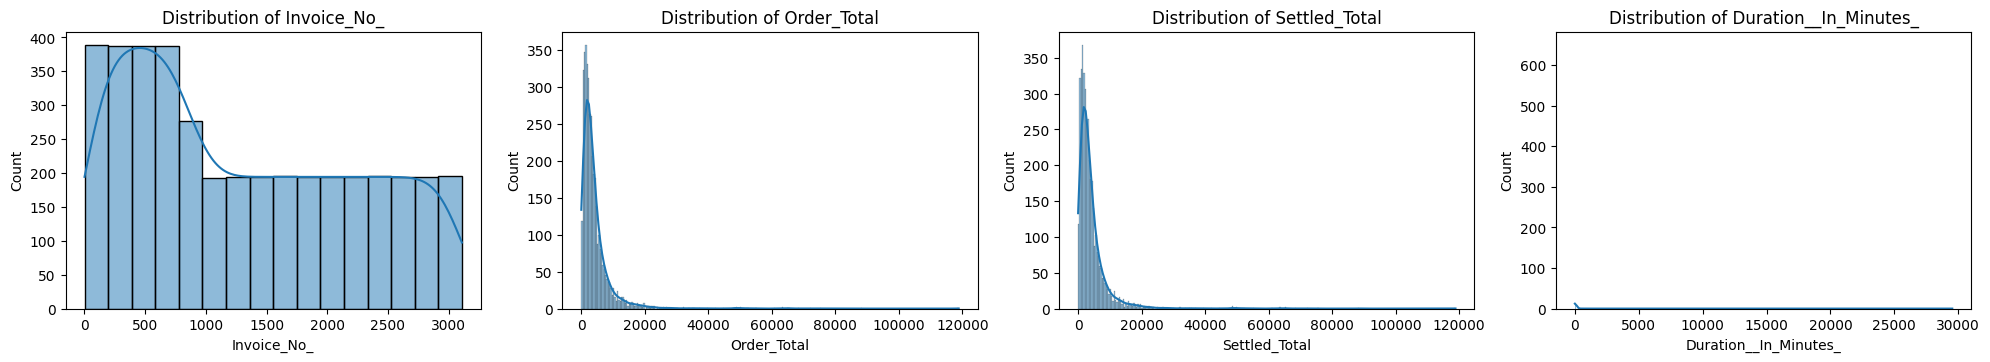


 **** Boxplot ****


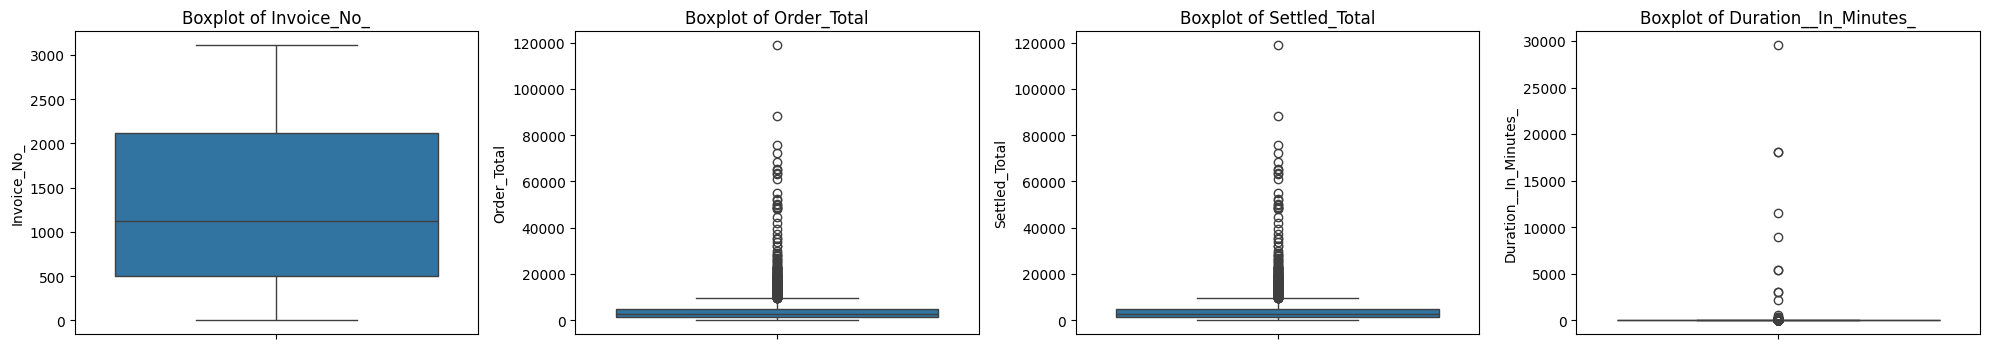


 **** Pairplot ****


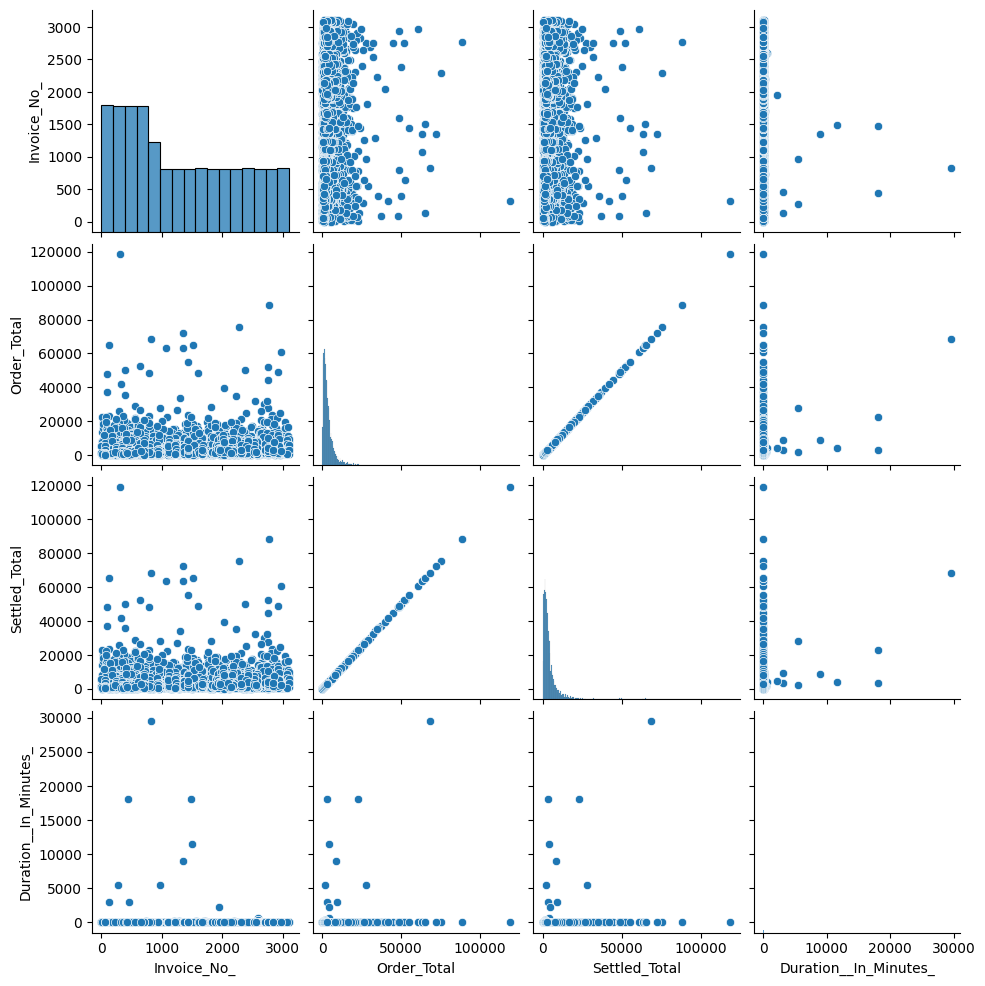


 **** Countplot ****


In [ ]:
EDA(billSet)

### Combined Consumption
Clean enough, though some columns have some nulls, but since big dataset (1M+) maybe can be dropped

In [ ]:
combined_consumption = pd.read_csv('/content/PS_DATA/Prepared from Raw/COMBINED_CONSUMPTION.csv')
combined_consumption.shape

(1386028, 11)

In [ ]:
combined_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386028 entries, 0 to 1386027
Data columns (total 11 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Date              1386028 non-null  object 
 1   Item_Name         1386028 non-null  object 
 2   Qty_              1386028 non-null  float64
 3   Timestamp         1386028 non-null  object 
 4   Raw_Material      1386028 non-null  object 
 5   Unit              1384914 non-null  object 
 6   Qty               1384914 non-null  float64
 7   converted_qty     1358665 non-null  float64
 8   Purchase_Unit     1386028 non-null  object 
 9   Consumption_Unit  1386028 non-null  object 
 10  Conversion_Qty    1386028 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 116.3+ MB


In [ ]:
combined_consumption.head()

,Date,Item_Name,Qty_,Timestamp,Raw_Material,Unit,Qty,converted_qty,Purchase_Unit,Consumption_Unit,Conversion_Qty
0,2023-10-19,TEA,3.0,2023-10-19 22:25:34+00:00,Sugar,GM,15.0,0.015,Kg,GM,1000
1,2024-06-05,TEA,2.0,2024-06-05 19:09:37+00:00,Sugar,GM,15.0,0.015,Kg,GM,1000
2,2023-12-07,TEA,1.0,2023-12-07 13:03:27+00:00,Sugar,GM,15.0,0.015,Kg,GM,1000
3,2024-05-10,TEA,1.0,2024-05-10 12:54:19+00:00,Sugar,GM,15.0,0.015,Kg,GM,1000
4,2024-05-23,TEA,1.0,2024-05-23 18:14:26+00:00,Sugar,GM,15.0,0.015,Kg,GM,1000


In [ ]:
EDA(combined_consumption)

### Cancel Order summary
few cols need to be dropped.

In [ ]:
cancel_order = pd.read_csv('/content/PS_DATA/Prepared from Raw/CancelOrder_Summary_Item_Report.csv')

cancel_order.shape

(7, 30)

In [ ]:
cancel_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   restaurant_name      7 non-null      object 
 1   invoice_no           7 non-null      int64  
 2   date                 7 non-null      object 
 3   payment_type         7 non-null      object 
 4   order_type           7 non-null      object 
 5   status               7 non-null      object 
 6   area                 7 non-null      object 
 7   virtual_brand_name   0 non-null      float64
 8   brand_grouping       7 non-null      object 
 9   assign_to            0 non-null      float64
 10  customer_phone       0 non-null      float64
 11  customer_name        7 non-null      object 
 12  customer_address     7 non-null      object 
 13  persons              0 non-null      float64
 14  order_cancel_reason  7 non-null      object 
 15  my_amount            7 non-null      int64  

### Category_Consumptios

In [ ]:
category_consumption = pd.read_csv('/content/PS_DATA/Prepared from Raw/Category_Consumption.csv')

category_consumption.shape

(104, 4)

In [ ]:
category_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    104 non-null    object 
 1   New_Category             88 non-null     object 
 2   Total_Consumption        104 non-null    float64
 3   Total_Internal_Transfer  0 non-null      float64
dtypes: float64(2), object(2)
memory usage: 3.4+ KB


In [ ]:
category_consumption.head()

,Month,New_Category,Total_Consumption,Total_Internal_Transfer
0,2024-Mar,NaN,148708.9,NaN
1,2024-Feb,NaN,742711.0,NaN
2,2024-Jan,NaN,541296.8,NaN
3,2023-Nov,NaN,222126.3,NaN
4,2024-Aug,NaN,898510.9,NaN


In [ ]:
non_null_transfers = category_consumption.dropna(subset=['New_Category'])
non_null_transfers.head()

,Month,New_Category,Total_Consumption,Total_Internal_Transfer
16,2023-Oct,Bar,2034446.6,NaN
17,2024-Sep,Bar,1853528.9,NaN
18,2024-Aug,Bar,2059565.4,NaN
19,2024-Jul,Bar,1805692.8,NaN
20,2023-Dec,Bar,2421837.8,NaN


### Consumption_Report

In [ ]:
consumption_report = pd.read_csv('/content/PS_DATA/Prepared from Raw/Consumption_Report.csv')

consumption_report.shape

(1588805, 12)

In [ ]:
consumption_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1588805 entries, 0 to 1588804
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Date              1588805 non-null  object 
 1   Item_Name         1588805 non-null  object 
 2   Qty_              1588805 non-null  float64
 3   Timestamp         1588805 non-null  object 
 4   Category          1588805 non-null  object 
 5   Raw_Material      1588805 non-null  object 
 6   Unit              1588805 non-null  object 
 7   Qty               1588805 non-null  float64
 8   converted_qty     1588805 non-null  float64
 9   Purchase_Unit     1588805 non-null  object 
 10  Consumption_Unit  1588805 non-null  object 
 11  Conversion_Qty    1588805 non-null  int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 145.5+ MB


In [ ]:
consumption_report.head()

,Date,Item_Name,Qty_,Timestamp,Category,Raw_Material,Unit,Qty,converted_qty,Purchase_Unit,Consumption_Unit,Conversion_Qty
0,2024-09-10,TEA,1.0,2024-09-10 22:50:58+00:00,PANTRY,Sugar,GM,15.0,0.015,Kg,GM,1000
1,2024-05-23,TEA,1.0,2024-05-23 18:14:26+00:00,PANTRY,Sugar,GM,15.0,0.015,Kg,GM,1000
2,2024-01-10,TEA,1.0,2024-01-10 16:06:54+00:00,PANTRY,Sugar,GM,15.0,0.015,Kg,GM,1000
3,2024-07-16,TEA,1.0,2024-07-16 18:22:48+00:00,PANTRY,Sugar,GM,15.0,0.015,Kg,GM,1000
4,2024-06-30,TEA,1.0,2024-06-30 19:26:20+00:00,PANTRY,Sugar,GM,15.0,0.015,Kg,GM,1000


### KOT AUDIT

In [ ]:
audit_data = pd.read_csv('/content/PS_DATA/Prepared from Raw/KOT_AUDIT_DATA.csv')

audit_data.shape

(246714, 28)

In [ ]:
audit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246714 entries, 0 to 246713
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   KOT_ID_k                       246714 non-null  float64
 1   Order_Type_k                   246714 non-null  object 
 2   Table_No_k                     228524 non-null  object 
 3   Server_Name_k                  244335 non-null  object 
 4   Item_Name_k                    244328 non-null  object 
 5   Quantity_k                     246714 non-null  float64
 6   Price_k                        246714 non-null  float64
 7   Item_Status_k                  246714 non-null  object 
 8   Punch_Time_k                   246714 non-null  object 
 9   Prepared_Time_k                244797 non-null  object 
 10  Preparation_Time_Taken_Mins_k  244797 non-null  float64
 11  string_field_1                 201299 non-null  object 
 12  KOT_No_                       

In [ ]:
audit_data.head()

,KOT_ID_k,Order_Type_k,Table_No_k,Server_Name_k,Item_Name_k,Quantity_k,Price_k,Item_Status_k,Punch_Time_k,Prepared_Time_k,...,Created,Bill_Print_Date,Complete_Duration,Item_Name,Item_Modified_Date,User,Old_Value,New_Value,KOT_Item_Status,Price
0,0.0,Dine In,G 2,NaN,NaN,0.0,0.0,Cancelled,2024-05-16 20:24:35+00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,Dine In,15,NaN,NaN,0.0,0.0,Cancelled,2023-11-20 20:15:39+00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,Dine In,30,NaN,NaN,0.0,0.0,Cancelled,2024-05-12 19:54:48+00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,Dine In,30,NaN,NaN,0.0,0.0,Cancelled,2024-05-17 20:10:48+00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,Dine In,9,NaN,NaN,0.0,0.0,Cancelled,2024-01-10 20:25:13+00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Master_data

In [ ]:
master_data = pd.read_csv('/content/PS_DATA/Prepared from Raw/KOT_MASTERDATA.csv')

master_data.shape

(246669, 12)

In [ ]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246669 entries, 0 to 246668
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   KOT_ID_k                       246669 non-null  float64
 1   Order_Type_k                   246669 non-null  object 
 2   Table_No_k                     228490 non-null  object 
 3   Server_Name_k                  244306 non-null  object 
 4   Item_Name_k                    244299 non-null  object 
 5   Quantity_k                     246669 non-null  float64
 6   Price_k                        246669 non-null  float64
 7   Item_Status_k                  246669 non-null  object 
 8   Punch_Time_k                   246669 non-null  object 
 9   Prepared_Time_k                244768 non-null  object 
 10  Preparation_Time_Taken_Mins_k  244768 non-null  float64
 11  string_field_1                 201273 non-null  object 
dtypes: float64(4), object(8)
memor

In [ ]:
master_data.head()

,KOT_ID_k,Order_Type_k,Table_No_k,Server_Name_k,Item_Name_k,Quantity_k,Price_k,Item_Status_k,Punch_Time_k,Prepared_Time_k,Preparation_Time_Taken_Mins_k,string_field_1
0,90.0,Pick Up,NaN,SANJAY MEHTA,TEA,4.0,100.0,Success,2023-11-22 16:13:11+00:00,2023-11-22 22:12:52+00:00,359.68,PANTRY
1,145.0,Delivery (Parcel),NaN,Autoaccept,Naan,1.0,130.0,Success,2024-01-16 21:36:13+00:00,2024-01-16 21:42:03+00:00,5.83,TANDOOR BREADS
2,236.0,Delivery (Parcel),NaN,UMESH PATHE,Naan,1.0,130.0,Success,2023-12-31 19:52:07+00:00,2023-12-31 20:36:53+00:00,44.77,TANDOOR BREADS
3,185.0,Delivery (Parcel),NaN,Autoaccept,Naan,1.0,130.0,Success,2023-10-21 20:47:10+00:00,2023-10-21 21:09:37+00:00,22.45,TANDOOR BREADS
4,179.0,Delivery (Parcel),NaN,Autoaccept,Naan,1.0,130.0,Success,2023-11-15 19:52:46+00:00,2023-11-15 20:08:12+00:00,15.43,TANDOOR BREADS


### Report_Modifications_Of_Item

In [ ]:
report_mods = pd.read_csv('/content/PS_DATA/Prepared from Raw/KOT_Report_Modifications_Of_Item.csv')

report_mods.shape

(911, 16)

In [ ]:
report_mods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   KOT_No_             911 non-null    int64  
 1   Order_Type          911 non-null    object 
 2   Customer_Name       730 non-null    object 
 3   Customer_Phone      757 non-null    float64
 4   Status              911 non-null    object 
 5   Reason              475 non-null    object 
 6   Created             911 non-null    object 
 7   Bill_Print_Date     711 non-null    object 
 8   Complete_Duration   911 non-null    object 
 9   Item_Name           709 non-null    object 
 10  Item_Modified_Date  901 non-null    object 
 11  User                901 non-null    object 
 12  Old_Value           708 non-null    object 
 13  New_Value           708 non-null    object 
 14  KOT_Item_Status     911 non-null    object 
 15  Price               709 non-null    float64
dtypes: float

In [ ]:
report_mods.head()

,KOT_No_,Order_Type,Customer_Name,Customer_Phone,Status,Reason,Created,Bill_Print_Date,Complete_Duration,Item_Name,Item_Modified_Date,User,Old_Value,New_Value,KOT_Item_Status,Price
0,178,Delivery(Parcel),Dishti Gurnani,NaN,Cancelled,Order rejected due to 'Customer cancellation d...,2024-04-21 20:08:42+00:00,2024-04-21 20:08:43,-,NaN,NaN,NaN,NaN,NaN,KOT Cancelled,NaN
1,0,Dine In (G 2),kamal,9.820035e+09,Cancelled,System has cancelled KOT due to unavailability...,2024-05-18 12:41:42+00:00,NaN,-,NaN,NaN,NaN,NaN,NaN,KOT Cancelled,NaN
2,0,Dine In (10),SUSHIL SHAH,9.820040e+09,Cancelled,System has cancelled KOT due to unavailability...,2024-05-17 19:47:36+00:00,NaN,-,NaN,NaN,NaN,NaN,NaN,KOT Cancelled,NaN
3,0,Dine In (16),OZA,9.930831e+09,Cancelled,System has cancelled KOT due to unavailability...,2024-05-16 22:48:46+00:00,NaN,-,NaN,NaN,NaN,NaN,NaN,KOT Cancelled,NaN
4,0,Dine In (14),JAGRUT JAIN,9.819856e+09,Cancelled,System has cancelled KOT due to unavailability...,2024-05-12 20:46:15+00:00,NaN,-,NaN,NaN,NaN,NaN,NaN,KOT Cancelled,NaN


### Order_After_Print_Modifications
clean -> contains canfed order logs, in form of text

In [ ]:
print_mods = pd.read_csv('/content/PS_DATA/Prepared from Raw/Order_report_After_Print_Modification.csv')

print_mods.shape

(110, 3)

In [ ]:
print_mods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Invoice_No_  110 non-null    int64 
 1   Date         110 non-null    object
 2   Change_Log   110 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.7+ KB


In [ ]:
print_mods.head()

,Invoice_No_,Date,Change_Log
0,3108,2024-05-23 23:58:01+00:00,"Order (Bill No.: F3108, Amount: 3793) is creat..."
1,848,2024-05-23 13:09:47+00:00,Order (Bill No.: B848) total amount changed fr...
2,3062,2024-05-23 13:09:45+00:00,"Order (Bill No.: F3062, Amount: 1190) is creat..."
3,2953,2024-05-20 21:53:49+00:00,"Order (Bill No.: F2953, Amount: 10259) is crea..."
4,2910,2024-05-19 23:31:56+00:00,"Order (Bill No.: F2910, Amount: 8335) is creat..."


from matplotlib import pyplot as plt
_df_0['Invoice_No_'].plot(kind='hist', bins=20, title='Invoice_No_')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Change_Log').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Invoice_No_']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Invoice_No_')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Invoice_No_']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Change_Log')):
  _plot_series(series, series_name, i)
  fig.legend(title='Change_Log', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Invoice_No_')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Change_Log')):
  _plot_series(series, series_name, i)
  fig.legend(title='Change_Log', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['Invoice_No_'].plot(kind='line', figsize=(8, 4), title='Invoice_No_')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Change_Log'].value_counts()
    for x_label, grp in _df_8.groupby('Date')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Date')
_ = plt.ylabel('Change_Log')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='Invoice_No_', y='Date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['Change_Log'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='Invoice_No_', y='Change_Log', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

### Restaurants_order_discounted_summary

In [ ]:
discounts = pd.read_csv('/content/PS_DATA/Prepared from Raw/Restaurants_order_discounted_summary.csv')

discounts.shape

(94, 14)

In [ ]:
discounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Created_Date       90 non-null     object 
 1   Order_No_          90 non-null     float64
 2   Order_Type         90 non-null     object 
 3   Biller_Name        90 non-null     object 
 4   Customer_Name      89 non-null     object 
 5   Customer_Phone     90 non-null     float64
 6   Coupon             0 non-null      float64
 7   Discount           90 non-null     object 
 8   Reason             90 non-null     object 
 9   My_Amount______    90 non-null     float64
 10  Discount______     90 non-null     float64
 11  Tax______          90 non-null     float64
 12  Round_Off______    90 non-null     float64
 13  Grand_Total______  90 non-null     float64
dtypes: float64(8), object(6)
memory usage: 10.4+ KB


In [ ]:
discounts.dropna()

In [ ]:
discounts.head()

,Created_Date,Order_No_,Order_Type,Biller_Name,Customer_Name,Customer_Phone,Coupon,Discount,Reason,My_Amount______,Discount______,Tax______,Round_Off______,Grand_Total______
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19 May 2024,2885.0,Pick Up,TAPASH,IMRAN BHAI,9.820046e+09,NaN,Special Discount,REF.SANJAY SIR,4460.0,669.0,189.6,0.4,3981.0


### SALES_MASTERDATA

In [ ]:
sales_masterdata = pd.read_csv('/content/PS_DATA/Prepared from Raw/SALES_MASTERDATA.csv')

sales_masterdata.shape

(264385, 141)

In [ ]:
sales_masterdata.head()

,Date,Timestamp,Invoice_No_,Payment_Type,Order_Type,Area,Item_Name,Price,Qty_,Sub_Total,...,Invoice_Id_sf,Table_No_sf,Order_Type_sf,Answer_sf,Created_sf,PAX,Food_Preparation_Time_Z,Food_Preparation_Time_S,Zomato_Delivery_Time,Swiggy_Delivery_Time
0,2023-07-15,2023-07-16 01:03:33+00:00,C245,Cash,Dine In,NaN,Bottled Water,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-07-14,2023-07-14 21:06:03+00:00,C230,Cash,Dine In,NaN,Bottled Water,0.0,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,2023-07-10,2023-07-10 15:35:08+00:00,C181,Cash,Dine In,NaN,Bottled Water,0.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-07-10,2023-07-10 23:18:48+00:00,C186,Cash,Dine In,NaN,Bottled Water,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-07-04,2023-07-04 23:23:41+00:00,C122,Cash,Dine In,NaN,Bottled Water,0.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [ ]:
for col in sales_masterdata.columns:
    print(f'{col},  dtype: {sales_masterdata[col].dtype} null_values = {sales_masterdata[col].isnull().sum()}')

Date,  dtype: object null_values = 0
Timestamp,  dtype: object null_values = 0
Invoice_No_,  dtype: object null_values = 0
Payment_Type,  dtype: object null_values = 0
Order_Type,  dtype: object null_values = 0
Area,  dtype: object null_values = 164
Item_Name,  dtype: object null_values = 0
Price,  dtype: float64 null_values = 0
Qty_,  dtype: float64 null_values = 0
Sub_Total,  dtype: float64 null_values = 0
Discount,  dtype: float64 null_values = 0
Tax,  dtype: float64 null_values = 0
Final_Total,  dtype: float64 null_values = 0
Status,  dtype: object null_values = 0
Table_No_,  dtype: object null_values = 19887
Server_Name,  dtype: object null_values = 0
Covers,  dtype: float64 null_values = 0
Variation,  dtype: object null_values = 218991
Category,  dtype: object null_values = 0
HSN,  dtype: float64 null_values = 264385
Phone,  dtype: float64 null_values = 264385
Name,  dtype: float64 null_values = 264385
Address,  dtype: object null_values = 248536
GST,  dtype: object null_values =

### sales_audit

In [ ]:
sales_md_audit = pd.read_csv('/content/PS_DATA/Prepared from Raw/SALES_MASTERDATA_AUDIT.csv')

sales_md_audit.shape

FileNotFoundError: [Errno 2] No such file or directory: '/content/PS_DATA/Prepared from Raw/SALES_MASTERDATA_AUDIT.csv'

In [ ]:
sales_md_audit.head()

,Date,Timestamp,Invoice_No_,Payment_Type,Order_Type,Area,Item_Name,Price,Qty_,Sub_Total,Discount,Tax,Final_Total,Status,Table_No_,Server_Name,Covers,Variation,Category,HSN,Phone,Name,Address,GST,Assign_To,Non_Taxable,CGST_Rate,CGST_Amount,SGST_Rate,SGST_Amount,VAT_Rate,VAT_Amount,Service_Charge_Rate,Service_Charge_Amount,Date_z,Invoice_Date_z,Aggregator_Order_No_z,PoS_Invoice_No_z,Order_From_z,Outlet_Name_z,Petpooja_Identifier_z,Order_Type_z,Customer_Name_z,Customer_Phone_z,Payment_Type_z,Delivery_status_z,Status_z,My_amount_z,Aggregator_Discount_z,Outlet_Discount_z,Delivery_Charges_z,Container_Charges_z,CGST_z,SGST_z,IGST_z,Total_z,Order_Acceptance_Time_z,Order_Delivery_Time_z,Reason_z,Online_Tax_Calculated_z,GST_Paid_by_Merchant_z,GST_Paid_by_Ecommerce_z,Restaurant_ID_z,Client_Sharing_Code_z,Identifier_z,Order_ID_z,Order_Status_z,Received_Time_z,Accepted_Time_z,Mark_Ready_Time_z,Rider_Arrival_Time_z,Picked_up_Time_z,Delivered_Time_z,Cancelled_Time_z,Date_s,Invoice_Date_s,Aggregator_Order_No_s,PoS_Invoice_No_s,Order_From_s,Outlet_Name_s,Petpooja_Identifier_s,Order_Type_s,Customer_Name_s,Customer_Phone_s,Payment_Type_s,Delivery_status_s,Status_s,My_amount_s,Aggregator_Discount_s,Outlet_Discount_s,Delivery_Charges_s,Container_Charges_s,CGST_s,SGST_s,IGST_s,Total_s,Order_Acceptance_Time_s,Order_Delivery_Time_s,Reason_s,Online_Tax_Calculated_s,GST_Paid_by_Merchant_s,GST_Paid_by_Ecommerce_s,Restaurant_ID_s,Client_Sharing_Code_s,Identifier_s,Order_ID_s,Order_Status_s,Received_Time_s,Accepted_Time_s,Mark_Ready_Time_s,Rider_Arrival_Time_s,Picked_up_Time_s,Delivered_Time_s,Cancelled_Time_s,Customer_Name_ff,Date_of_Birth_ff,Date_of_Anniversary_ff,Customer_Phone_ff,From__ff,Customer_Email_ff,Invoice_Id_ff,Table_No_ff,Order_Type_ff,Answer_ff,Created_ff,Customer_Name_sf,Date_of_Birth_sf,Date_of_Anniversary_sf,Customer_Phone_sf,From__sf,Customer_Email_sf,Invoice_Id_sf,Table_No_sf,Order_Type_sf,Answer_sf,Created_sf,PAX,Biller_BSR,First_Print_Date_BSR,Last_Settlement_Date_BSR,Duration__In_Minutes_BSR,Settled_By_BSR,area_co,order_cancel_reason_co,Cancelled_Invoice_Total_co,Change_Log_ORAP,Discount_Order_Type_DSR,Biller_Name,Discount_DSR,Reason_DSR,Food_Preparation_Time_Z,Food_Preparation_Time_S,Zomato_Delivery_Time,Swiggy_Delivery_Time,amount_from,amount_to,modified_by,modify_comment,electron_pos,bill_no,invoice_no,date_orap
0,2024-01-13,2024-01-13 20:45:54+00:00,13180,CARD,Dine In,Dine in,Bottled Water,0.0,1.0,0.0,0.0,0.0,0.0,Success,1,MK,4.0,NaN,Complementary,NaN,NaN,NaN,NaN,NaN,MK,0.0,2.5,0.0,2.5,0.0,10.0,0.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-10-12,2023-10-12 22:20:37+00:00,7131,Cash,Dine In,Dine in,Bottled Water,0.0,1.0,0.0,0.0,0.0,0.0,Success,16,SM,4.0,NaN,Complementary,NaN,NaN,NaN,NaN,NaN,SM,0.0,2.5,0.0,2.5,0.0,10.0,0.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-12-17,2023-12-17 15:01:02+00:00,11414,CARD,Dine In,Garden Table,Bottled Water,0.0,3.0,0.0,0.0,0.0,0.0,Success,G 1,SK,0.0,NaN,Complementary,NaN,NaN,NaN,NaN,NaN,SK,0.0,2.5,0.0,2.5,0.0,10.0,0.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
CustomInfo(sales_md_audit)

Date,  dtype: object null_values = 0
Timestamp,  dtype: object null_values = 0
Invoice_No_,  dtype: object null_values = 0
Payment_Type,  dtype: object null_values = 0
Order_Type,  dtype: object null_values = 0
Area,  dtype: object null_values = 164
Item_Name,  dtype: object null_values = 0
Price,  dtype: float64 null_values = 0
Qty_,  dtype: float64 null_values = 0
Sub_Total,  dtype: float64 null_values = 0
Discount,  dtype: float64 null_values = 0
Tax,  dtype: float64 null_values = 0
Final_Total,  dtype: float64 null_values = 0
Status,  dtype: object null_values = 0
Table_No_,  dtype: object null_values = 20049
Server_Name,  dtype: object null_values = 0
Covers,  dtype: float64 null_values = 0
Variation,  dtype: object null_values = 219216
Category,  dtype: object null_values = 0
HSN,  dtype: float64 null_values = 264636
Phone,  dtype: float64 null_values = 264636
Name,  dtype: float64 null_values = 264636
Address,  dtype: object null_values = 248657
GST,  dtype: object null_values =

### SWIGGY_MD

In [ ]:
swiggy_md = pd.read_csv('/content/PS_DATA/Prepared from Raw/SWIGGY_MASTERDATA.csv')

swiggy_md.shape

FileNotFoundError: [Errno 2] No such file or directory: '/content/PS_DATA/Prepared from Raw/SWIGGY_MASTERDATA.csv'

In [ ]:
swiggy_md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219 entries, 0 to 1218
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date_s                   1219 non-null   object 
 1   Invoice_Date_s           1197 non-null   object 
 2   Aggregator_Order_No_s    1219 non-null   float64
 3   PoS_Invoice_No_s         1219 non-null   int64  
 4   Order_From_s             1219 non-null   object 
 5   Outlet_Name_s            0 non-null      float64
 6   Petpooja_Identifier_s    0 non-null      float64
 7   Order_Type_s             1219 non-null   object 
 8   Customer_Name_s          1219 non-null   object 
 9   Customer_Phone_s         28 non-null     float64
 10  Payment_Type_s           1219 non-null   object 
 11  Delivery_status_s        1219 non-null   object 
 12  Status_s                 1219 non-null   object 
 13  My_amount_s              1219 non-null   float64
 14  Aggregator_Discount_s   

In [ ]:
swiggy_md.head()

,Date_s,Invoice_Date_s,Aggregator_Order_No_s,PoS_Invoice_No_s,Order_From_s,Outlet_Name_s,Petpooja_Identifier_s,Order_Type_s,Customer_Name_s,Customer_Phone_s,Payment_Type_s,Delivery_status_s,Status_s,My_amount_s,Aggregator_Discount_s,Outlet_Discount_s,Delivery_Charges_s,Container_Charges_s,CGST_s,SGST_s,IGST_s,Total_s,Order_Acceptance_Time_s,Order_Delivery_Time_s,Reason_s,Online_Tax_Calculated_s,GST_Paid_by_Merchant_s,GST_Paid_by_Ecommerce_s,Restaurant_ID_s,Client_Sharing_Code_s,Identifier_s,Order_ID_s,Order_Status_s,Received_Time_s,Accepted_Time_s,Mark_Ready_Time_s,Rider_Arrival_Time_s,Picked_up_Time_s,Delivered_Time_s,Cancelled_Time_s
0,2024-01-22 22:29:00+00:00,2024-01-22,1.649123e+14,13809,Swiggy,NaN,NaN,Delivery,SWIGGY,NaN,Online,Swiggy - Mohd Sameer Shaikh ( 8286442199 ),Delivered,2270.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2384.0,0.0,3038.0,NaN,NaN,NaN,NaN,126543.0,5ojxvbyp,NaN,1.649123e+14,Delivered,2024-01-22 22:29:00+00:00,2024-01-22 22:29:00+00:00,2024-01-22 22:42:00+00:00,2024-01-22 22:57:00+00:00,2024-01-22 23:01:00+00:00,2024-01-22 23:19:00+00:00,NaN
1,2023-12-25 13:32:00+00:00,2023-12-25,1.624609e+14,11890,Swiggy,NaN,NaN,Delivery,SWIGGY,NaN,Online,Swiggy - Sonu Kamat ( 8709563655 ),Delivered,2200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2310.0,0.0,2095.0,NaN,NaN,NaN,NaN,126543.0,5ojxvbyp,NaN,1.624609e+14,Delivered,2023-12-25 13:32:00+00:00,2023-12-25 13:32:00+00:00,2023-12-25 13:47:00+00:00,2023-12-25 13:54:00+00:00,2023-12-25 13:57:00+00:00,2023-12-25 14:07:00+00:00,NaN
2,2024-01-28 20:47:00+00:00,2024-01-28,1.654246e+14,14169,Swiggy,NaN,NaN,Delivery,SWIGGY,NaN,Online,Swiggy - Govind Kamti ( 9892370531 ),Delivered,1955.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2053.0,0.0,1658.0,NaN,NaN,NaN,NaN,126543.0,5ojxvbyp,NaN,1.654246e+14,Delivered,2024-01-28 20:47:00+00:00,2024-01-28 20:47:00+00:00,2024-01-28 21:02:00+00:00,2024-01-28 21:03:00+00:00,2024-01-28 21:05:00+00:00,2024-01-28 21:14:00+00:00,NaN
3,2023-12-23 20:25:00+00:00,2023-12-23,1.623130e+14,11738,Swiggy,NaN,NaN,Delivery,SWIGGY,NaN,Online,Swiggy,Cancelled,795.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,835.0,0.0,0.0,NaN,NaN,NaN,NaN,126543.0,5ojxvbyp,NaN,1.623130e+14,Cancelled,2023-12-23 20:25:00+00:00,2023-12-23 20:25:00+00:00,NaN,NaN,NaN,NaN,2023-12-23 20:26:00+00:00
4,2024-09-01 13:41:00+00:00,2024-01-09,1.637575e+14,12921,Swiggy,NaN,NaN,Delivery,SWIGGY,NaN,Online,Swiggy - Ravindra Kumar Kamat ( 8409536100 ),Delivered,795.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,835.0,0.0,1198.0,NaN,NaN,NaN,NaN,126543.0,5ojxvbyp,NaN,1.637575e+14,Delivered,2024-09-01 13:41:00+00:00,2024-09-01 13:41:00+00:00,2024-09-01 13:53:00+00:00,2024-09-01 13:55:00+00:00,2024-09-01 13:55:00+00:00,2024-09-01 14:01:00+00:00,NaN


### Zomato_MasterData

In [ ]:
zomato_md = pd.read_csv('/content/PS_DATA/Prepared from Raw/ZOMATO_MASTERDATA.csv')

zomato_md.shape

FileNotFoundError: [Errno 2] No such file or directory: '/content/PS_DATA/Prepared from Raw/ZOMATO_MASTERDATA.csv'

In [ ]:
zomato_md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840 entries, 0 to 1839
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date_z                   1840 non-null   object 
 1   Invoice_Date_z           1840 non-null   object 
 2   Aggregator_Order_No_z    1840 non-null   float64
 3   PoS_Invoice_No_z         1840 non-null   int64  
 4   Order_From_z             1840 non-null   object 
 5   Outlet_Name_z            0 non-null      float64
 6   Petpooja_Identifier_z    0 non-null      float64
 7   Order_Type_z             1840 non-null   object 
 8   Customer_Name_z          1840 non-null   object 
 9   Customer_Phone_z         41 non-null     float64
 10  Payment_Type_z           1840 non-null   object 
 11  Delivery_status_z        1840 non-null   object 
 12  Status_z                 1840 non-null   object 
 13  My_amount_z              1840 non-null   float64
 14  Aggregator_Discount_z   

In [ ]:
zomato_md.head()

,Date_z,Invoice_Date_z,Aggregator_Order_No_z,PoS_Invoice_No_z,Order_From_z,Outlet_Name_z,Petpooja_Identifier_z,Order_Type_z,Customer_Name_z,Customer_Phone_z,Payment_Type_z,Delivery_status_z,Status_z,My_amount_z,Aggregator_Discount_z,Outlet_Discount_z,Delivery_Charges_z,Container_Charges_z,CGST_z,SGST_z,IGST_z,Total_z,Order_Acceptance_Time_z,Order_Delivery_Time_z,Reason_z,Online_Tax_Calculated_z,GST_Paid_by_Merchant_z,GST_Paid_by_Ecommerce_z,Restaurant_ID_z,Client_Sharing_Code_z,Identifier_z,Order_ID_z,Order_Status_z,Received_Time_z,Accepted_Time_z,Mark_Ready_Time_z,Rider_Arrival_Time_z,Picked_up_Time_z,Delivered_Time_z,Cancelled_Time_z
0,2024-09-05 21:08:15+00:00,2024-09-05,6.155678e+09,9211,Zomato,NaN,NaN,Delivery,Vineet Rege,2.248970e+09,Online,Zomato,Cancelled,450.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,450.00,0.0,0.0,Items out of stock,22.5,0.0,22.5,126543.0,5ojxvbyp,NaN,6.155678e+09,Cancelled,2024-09-05 21:08:15+00:00,2024-09-05 21:08:16+00:00,NaN,NaN,NaN,NaN,5 Sep 2024 21:15:21
1,2024-09-12 20:06:20+00:00,2024-09-12,6.168473e+09,9599,Zomato,NaN,NaN,Delivery,Dhairya vakharia,NaN,Online,Zomato - Mohammad Mustaqim Abdul Jabbar Shaikh...,Cancelled,1050.0,0.0,200.00,0.0,0.0,0.0,0.0,0.0,850.00,0.0,0.0,Order rejected due to 'Delivery partner cancel...,42.5,0.0,42.5,126543.0,5ojxvbyp,NaN,6.168473e+09,Cancelled,2024-09-12 20:06:20+00:00,2024-09-12 20:06:21+00:00,2024-09-12 20:16:52+00:00,2024-09-12 20:22:22+00:00,2024-09-12 20:24:29+00:00,NaN,12 Sep 2024 20:46:59
2,2024-10-06 21:35:43+00:00,2024-10-06,6.245230e+09,11029,Zomato,NaN,NaN,Delivery,Anushka,NaN,Online,Zomato - Dharmendra Rampalat Yadav ( 865723169...,Cancelled,1560.0,0.0,234.00,0.0,0.0,0.0,0.0,0.0,1326.00,0.0,0.0,Order rejected due to 'Items out of stock',66.3,0.0,66.3,126543.0,5ojxvbyp,NaN,6.245230e+09,Cancelled,2024-10-06 21:35:43+00:00,2024-10-06 21:35:43+00:00,2024-10-06 21:47:18+00:00,2024-10-06 22:07:01+00:00,NaN,NaN,6 Oct 2024 22:58:23
3,2024-09-25 19:04:15+00:00,2024-09-25,6.211820e+09,10334,Zomato,NaN,NaN,Delivery,Rekha Chainani,NaN,Online,Zomato - Pankaj Rajbhai Maru ( 9702417920 ),Cancelled,2110.0,0.0,316.50,0.0,0.0,0.0,0.0,0.0,1793.50,0.0,0.0,Order rejected due to 'Delivery partner cancel...,89.7,0.0,89.7,126543.0,5ojxvbyp,NaN,6.211820e+09,Cancelled,2024-09-25 19:04:15+00:00,2024-09-25 19:04:15+00:00,2024-09-25 19:20:55+00:00,2024-09-25 19:21:35+00:00,2024-09-25 19:36:21+00:00,NaN,25 Sep 2024 19:44:21
4,2024-10-12 19:34:44+00:00,2024-10-12,6.250541e+09,11351,Zomato,NaN,NaN,Delivery,Mehul Sheth,NaN,Online,Zomato,Cancelled,2325.0,0.0,348.75,0.0,0.0,0.0,0.0,0.0,1976.25,0.0,0.0,Order rejected due to 'Customer Cancellation',98.8,0.0,98.8,126543.0,5ojxvbyp,NaN,6.250541e+09,Cancelled,2024-10-12 19:34:44+00:00,2024-10-12 19:34:45+00:00,NaN,NaN,NaN,NaN,12 Oct 2024 19:35:40


In [ ]:
zomato_md['Status_z'].unique()

array(['Cancelled', 'Delivered'], dtype=object)

#***Part1***

                      Date_z Invoice_Date_z  Aggregator_Order_No_z  \
0  2024-09-05 21:08:15+00:00     2024-09-05           6.155678e+09   
1  2024-09-12 20:06:20+00:00     2024-09-12           6.168473e+09   
2  2024-10-06 21:35:43+00:00     2024-10-06           6.245230e+09   
3  2024-09-25 19:04:15+00:00     2024-09-25           6.211820e+09   
4  2024-10-12 19:34:44+00:00     2024-10-12           6.250541e+09   

   PoS_Invoice_No_z Order_From_z  Outlet_Name_z  Petpooja_Identifier_z  \
0              9211       Zomato            NaN                    NaN   
1              9599       Zomato            NaN                    NaN   
2             11029       Zomato            NaN                    NaN   
3             10334       Zomato            NaN                    NaN   
4             11351       Zomato            NaN                    NaN   

  Order_Type_z   Customer_Name_z  Customer_Phone_z  ... Identifier_z  \
0     Delivery       Vineet Rege      2.248970e+09  ...       

ValueError: num must be an integer with 1 <= num <= 12, not 13

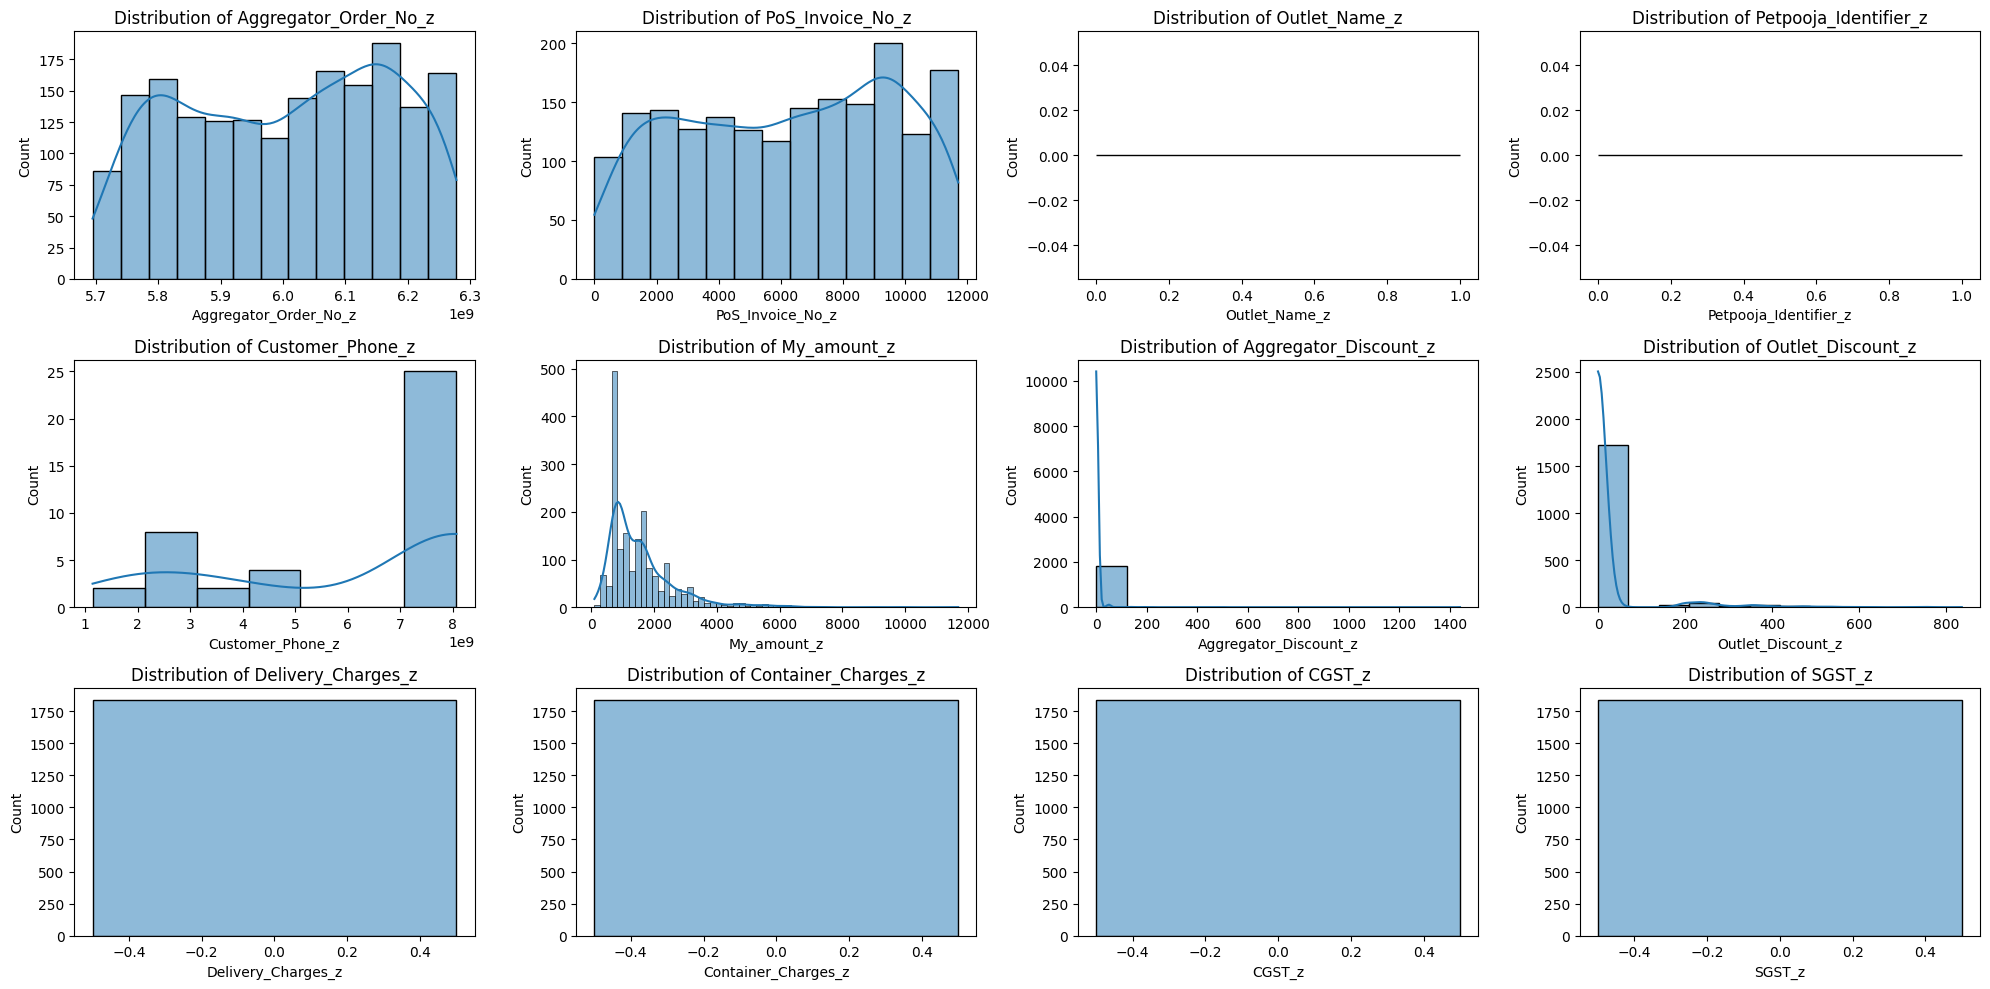

In [ ]:
# Load the CSV file using the full path
file_path = 'PS_DATA/Prepared from Raw/ZOMATO_MASTERDATA.csv'
df = pd.read_csv(file_path)
# EDA(df)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [6]:
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached pystan-3.10.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.1.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.0 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached httpstan-4.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pysimdjson-6.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.9 kB)
  Using cached crashtest-0.3.1-py3-none-any.whl.metadata (748 bytes)
  Using cached pastel-0.2.1-py2.py3-none-any.whl.metadata (1.9 k

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3zjphnsj/5o9zi7ac.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3zjphnsj/ivnx20ic.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42311', 'data', 'file=/tmp/tmp3zjphnsj/5o9zi7ac.json', 'init=/tmp/tmp3zjphnsj/ivnx20ic.json', 'output', 'file=/tmp/tmp3zjphnsj/prophet_modelx_x5397j/prophet_model-20241019202629.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:26:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:26:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


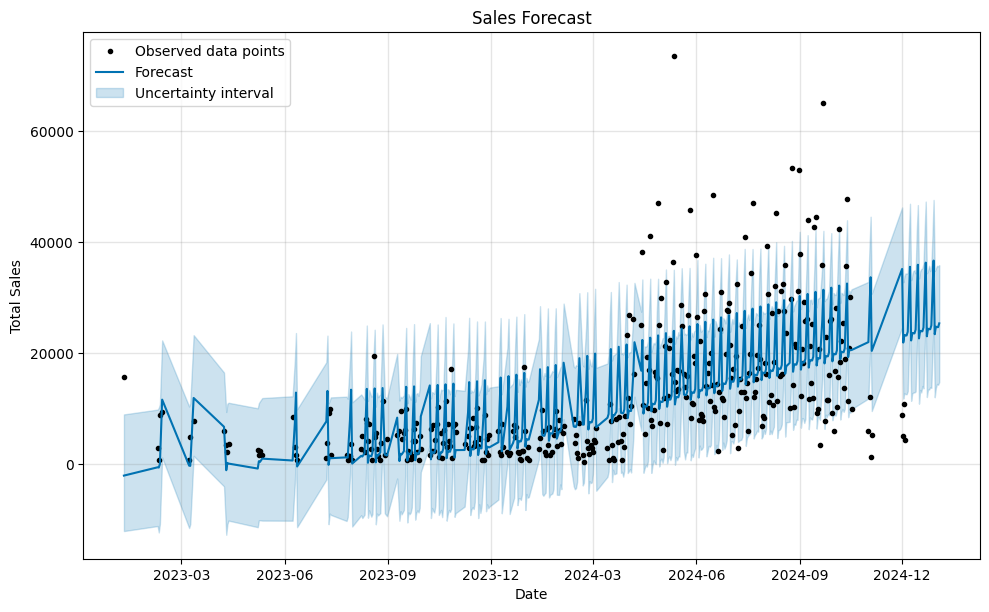

In [11]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('COMBINED_MASTERDATA.csv')  # Update the path

# Ensure the 'Date' column is a datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Group the data by date to sum the total costs
daily_sales = data.groupby(data['Date'].dt.date).agg({'Total': 'sum'}).reset_index()

# Rename the columns for Prophet
daily_sales.rename(columns={'Date': 'ds', 'Total': 'y'}, inplace=True)

# Initialize and fit the Prophet model
model = Prophet()
model.fit(daily_sales)

# Create a DataFrame to hold future predictions
future = model.make_future_dataframe(periods=30)  # Predict for the next 30 days

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title("Sales Forecast")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


<ipython-input-12-b9ab10b7df4f>:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('MERGED_KOT_DATA.csv')  # Update the path to your CSV file
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3zjphnsj/52jatro5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3zjphnsj/kvx5fczw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37251', 'data', 'file=/tmp/tmp3zjphnsj/52jatro5.json', 'init=/tmp/tmp3zjphnsj/kvx5fczw.json', 'output', 'file=/tmp/tmp3zjphnsj/prophet_model49yf6cka/prophet_model-20241019204317.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:43:17 - cmdstanpy 

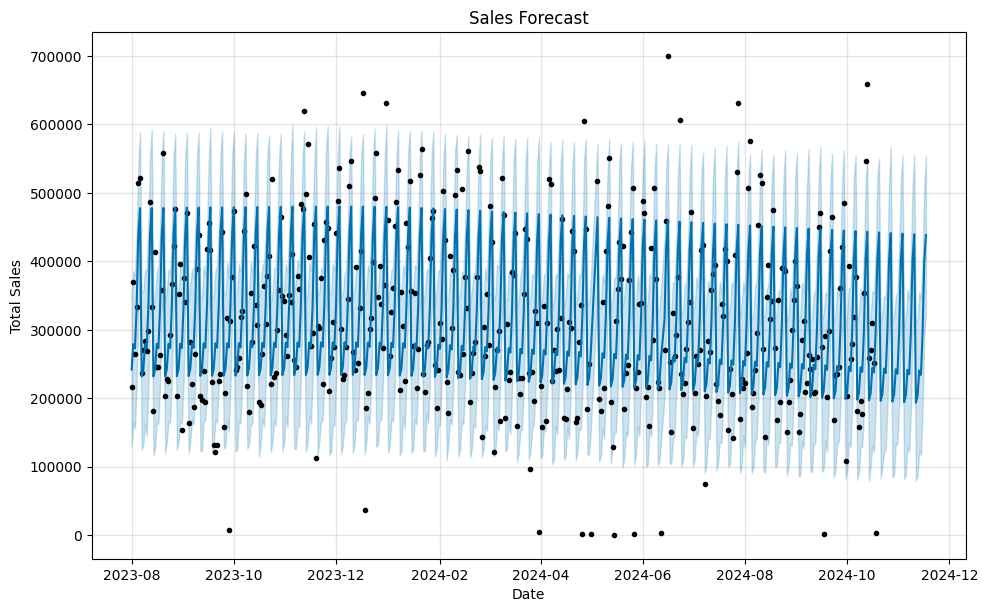

In [12]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('MERGED_KOT_DATA.csv')  # Update the path to your CSV file

# Ensure the 'Punch_Time_k' column is a datetime type
data['Punch_Time_k'] = pd.to_datetime(data['Punch_Time_k'])

# Group the data by date to sum the total price (assuming you want total sales)
daily_sales = data.groupby(data['Punch_Time_k'].dt.date).agg({'Price_k': 'sum'}).reset_index()

# Rename the columns for Prophet
daily_sales.rename(columns={'Punch_Time_k': 'ds', 'Price_k': 'y'}, inplace=True)

# Initialize and fit the Prophet model
model = Prophet()
model.fit(daily_sales)

# Create a DataFrame to hold future predictions
future = model.make_future_dataframe(periods=30)  # Predict for the next 30 days

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


In [13]:
# Display the forecast for the specific date
random_date = '2024-01-15'  # Change this to your desired date
specific_forecast = forecast[forecast['ds'] == random_date]

print(f"Forecast for {random_date}:")
print(specific_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


Forecast for 2024-01-15:
            ds           yhat     yhat_lower     yhat_upper
167 2024-01-15  232520.812112  119698.820328  346540.447727


In [17]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the datasets with low_memory=False to avoid mixed data types warning
kot_data = pd.read_csv('MERGED_KOT_DATA.csv', low_memory=False)
combined_data = pd.read_csv('COMBINED_MASTERDATA.csv', low_memory=False)

# Print column names to check for correct column names
print("KOT Data Columns:", kot_data.columns)
print("Combined Data Columns:", combined_data.columns)

# Step 1: Prepare the KOT data
# Assuming KOT data has columns 'Punch_Time_k' and 'KOT_ID_k'
kot_data['Punch_Time_k'] = pd.to_datetime(kot_data['Punch_Time_k'])
kot_orders = kot_data.groupby(kot_data['Punch_Time_k'].dt.date)['KOT_ID_k'].count().reset_index()
kot_orders.columns = ['ds', 'y']  # Rename columns for Prophet

# Step 2: Prepare the combined Swiggy and Zomato data
# Replace 'date' and 'order_count' with the actual column names from your combined_data
# Example: combined_data['actual_date_column'] = pd.to_datetime(combined_data['actual_date_column'])
combined_data['Date'] = pd.to_datetime(combined_data['Date'])  # Replace with actual column name
swiggy_orders = combined_data[combined_data['Order_From'] == 'Swiggy'].groupby('Date')['order_count'].sum().reset_index()
zomato_orders = combined_data[combined_data['Order_From'] == 'Zomato'].groupby('actual_date_column')['order_count'].sum().reset_index()

# Renaming columns
swiggy_orders.columns = ['ds', 'y_swiggy']
zomato_orders.columns = ['ds', 'y_zomato']

# Step 3: Combine all order data
# Merging KOT, Swiggy, and Zomato orders
total_orders = pd.merge(kot_orders, swiggy_orders, on='ds', how='outer')
total_orders = pd.merge(total_orders, zomato_orders, on='ds', how='outer')

# Fill NaN values with 0 and calculate total orders
total_orders.fillna(0, inplace=True)
total_orders['y_total'] = total_orders['y'] + total_orders['y_swiggy'] + total_orders['y_zomato']

# Step 4: Train the Prophet model
df_prophet = total_orders[['ds', 'y_total']].rename(columns={'y_total': 'y'})

# Initialize and fit the model
model = Prophet()
model.fit(df_prophet)

# Step 5: Make future predictions
future = model.make_future_dataframe(periods=30)  # Predicting the next 30 days
forecast = model.predict(future)

# Step 6: Visualize the results
fig = model.plot(forecast)
plt.title("Total Orders Forecast (KOT, Swiggy, Zomato)")
plt.xlabel("Date")
plt.ylabel("Total Orders")
plt.show()

# Step 7: Extract predictions for specific dates
specific_date = '2024-01-15'  # Example specific date
specific_forecast = forecast[forecast['ds'].dt.date == pd.to_datetime(specific_date).date()]
print(specific_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


KOT Data Columns: Index(['KOT_ID_k', 'Order_Type_k', 'Table_No_k', 'Server_Name_k',
       'Item_Name_k', 'Quantity_k', 'Price_k', 'Item_Status_k', 'Punch_Time_k',
       'Prepared_Time_k', 'Preparation_Time_Taken_Mins_k', 'Category',
       'Is_Audit'],
      dtype='object')
Combined Data Columns: Index(['Date', 'Invoice_Date', 'Aggregator_Order_No', 'PoS_Invoice_No',
       'Order_From', 'Order_Type', 'Customer_Name', 'Payment_Type',
       'Deliverytatus', 'Status', 'My_amount', 'Aggregator_Discount',
       'Outlet_Discount', 'Delivery_Charges', 'Container_Charges', 'CGST',
       'SGST', 'IGST', 'Total', 'Order_Acceptance_Time', 'Order_Delivery_Time',
       'Online_Tax_Calculated', 'GST_Paid_by_Merchant',
       'GST_Paid_by_Ecommerce', 'Restaurant_ID', 'Client_Sharing_Code',
       'Order_ID', 'Order_Status', 'Received_Time', 'Accepted_Time',
       'Mark_Ready_Time', 'Rider_Arrival_Time', 'Picked_up_Time',
       'Delivered_Time', 'Delivery_status'],
      dtype='object')


KeyError: 'Platform'

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the datasets with low_memory=False to avoid mixed data types warning
kot_data = pd.read_csv('MERGED_KOT_DATA.csv', low_memory=False)
combined_data = pd.read_csv('COMBINED_MASTERDATA.csv', low_memory=False)

# Print column names to check for correct column names
print("KOT Data Columns:", kot_data.columns)
print("Combined Data Columns:", combined_data.columns)

# Step 1: Prepare the KOT data
# Assuming KOT data has columns 'Punch_Time_k' and 'KOT_ID_k'
kot_data['Punch_Time_k'] = pd.to_datetime(kot_data['Punch_Time_k'])
kot_orders = kot_data.groupby(kot_data['Punch_Time_k'].dt.date)['KOT_ID_k'].count().reset_index()
kot_orders.columns = ['ds', 'y']  # Rename columns for Prophet

# Step 2: Prepare the combined Swiggy and Zomato data
# Replace 'date' and 'order_count' with the actual column names from your combined_data
# Example: combined_data['actual_date_column'] = pd.to_datetime(combined_data['actual_date_column'])
combined_data['Date'] = pd.to_datetime(combined_data['Date'])  # Replace with actual column name
swiggy_orders = combined_data[combined_data['Order_From'] == 'Swiggy'].groupby('Date')['order_count'].sum().reset_index()
zomato_orders = combined_data[combined_data['Order_From'] == 'Zomato'].groupby('actual_date_column')['order_count'].sum().reset_index()

# Renaming columns
swiggy_orders.columns = ['ds', 'y_swiggy']
zomato_orders.columns = ['ds', 'y_zomato']

# Step 3: Combine all order data
# Merging KOT, Swiggy, and Zomato orders
total_orders = pd.merge(kot_orders, swiggy_orders, on='ds', how='outer')
total_orders = pd.merge(total_orders, zomato_orders, on='ds', how='outer')

# Fill NaN values with 0 and calculate total orders
total_orders.fillna(0, inplace=True)
total_orders['y_total'] = total_orders['y'] + total_orders['y_swiggy'] + total_orders['y_zomato']

# Step 4: Train the Prophet model
df_prophet = total_orders[['ds', 'y_total']].rename(columns={'y_total': 'y'})

# Initialize and fit the model
model = Prophet()
model.fit(df_prophet)

# Step 5: Make future predictions
future = model.make_future_dataframe(periods=30)  # Predicting the next 30 days
forecast = model.predict(future)

# Step 6: Visualize the results
fig = model.plot(forecast)
plt.title("Total Orders Forecast (KOT, Swiggy, Zomato)")
plt.xlabel("Date")
plt.ylabel("Total Orders")
plt.show()

# Step 7: Extract predictions for specific dates
specific_date = '2024-01-15'  # Example specific date
specific_forecast = forecast[forecast['ds'].dt.date == pd.to_datetime(specific_date).date()]
print(specific_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


KOT Data Columns: Index(['KOT_ID_k', 'Order_Type_k', 'Table_No_k', 'Server_Name_k',
       'Item_Name_k', 'Quantity_k', 'Price_k', 'Item_Status_k', 'Punch_Time_k',
       'Prepared_Time_k', 'Preparation_Time_Taken_Mins_k', 'Category',
       'Is_Audit'],
      dtype='object')
Combined Data Columns: Index(['Date', 'Invoice_Date', 'Aggregator_Order_No', 'PoS_Invoice_No',
       'Order_From', 'Order_Type', 'Customer_Name', 'Payment_Type',
       'Deliverytatus', 'Status', 'My_amount', 'Aggregator_Discount',
       'Outlet_Discount', 'Delivery_Charges', 'Container_Charges', 'CGST',
       'SGST', 'IGST', 'Total', 'Order_Acceptance_Time', 'Order_Delivery_Time',
       'Online_Tax_Calculated', 'GST_Paid_by_Merchant',
       'GST_Paid_by_Ecommerce', 'Restaurant_ID', 'Client_Sharing_Code',
       'Order_ID', 'Order_Status', 'Received_Time', 'Accepted_Time',
       'Mark_Ready_Time', 'Rider_Arrival_Time', 'Picked_up_Time',
       'Delivered_Time', 'Delivery_status'],
      dtype='object')


KeyError: 'Platform'

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the datasets with low_memory=False to avoid mixed data types warning
kot_data = pd.read_csv('MERGED_KOT_DATA.csv', low_memory=False)
combined_data = pd.read_csv('COMBINED_MASTERDATA.csv', low_memory=False)

# Print column names to check for correct column names
print("KOT Data Columns:", kot_data.columns)
print("Combined Data Columns:", combined_data.columns)

# Step 1: Prepare the KOT data
# Assuming KOT data has columns 'Punch_Time_k' and 'KOT_ID_k'
kot_data['Punch_Time_k'] = pd.to_datetime(kot_data['Punch_Time_k'])
kot_orders = kot_data.groupby(kot_data['Punch_Time_k'].dt.date)['KOT_ID_k'].count().reset_index()
kot_orders.columns = ['ds', 'y']  # Rename columns for Prophet

# Step 2: Prepare the combined Swiggy and Zomato data
# Replace 'date' and 'order_count' with the actual column names from your combined_data
# Example: combined_data['actual_date_column'] = pd.to_datetime(combined_data['actual_date_column'])
combined_data['Date'] = pd.to_datetime(combined_data['Date'])  # Replace with actual column name
swiggy_orders = combined_data[combined_data['Order_From'] == 'Swiggy'].groupby('Date')['order_count'].sum().reset_index()
zomato_orders = combined_data[combined_data['Order_From'] == 'Zomato'].groupby('actual_date_column')['order_count'].sum().reset_index()

# Renaming columns
swiggy_orders.columns = ['ds', 'y_swiggy']
zomato_orders.columns = ['ds', 'y_zomato']

# Step 3: Combine all order data
# Merging KOT, Swiggy, and Zomato orders
total_orders = pd.merge(kot_orders, swiggy_orders, on='ds', how='outer')
total_orders = pd.merge(total_orders, zomato_orders, on='ds', how='outer')

# Fill NaN values with 0 and calculate total orders
total_orders.fillna(0, inplace=True)
total_orders['y_total'] = total_orders['y'] + total_orders['y_swiggy'] + total_orders['y_zomato']

# Step 4: Train the Prophet model
df_prophet = total_orders[['ds', 'y_total']].rename(columns={'y_total': 'y'})

# Initialize and fit the model
model = Prophet()
model.fit(df_prophet)

# Step 5: Make future predictions
future = model.make_future_dataframe(periods=30)  # Predicting the next 30 days
forecast = model.predict(future)

# Step 6: Visualize the results
fig = model.plot(forecast)
plt.title("Total Orders Forecast (KOT, Swiggy, Zomato)")
plt.xlabel("Date")
plt.ylabel("Total Orders")
plt.show()

# Step 7: Extract predictions for specific dates
specific_date = '2024-01-15'  # Example specific date
specific_forecast = forecast[forecast['ds'].dt.date == pd.to_datetime(specific_date).date()]
print(specific_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


KOT Data Columns: Index(['KOT_ID_k', 'Order_Type_k', 'Table_No_k', 'Server_Name_k',
       'Item_Name_k', 'Quantity_k', 'Price_k', 'Item_Status_k', 'Punch_Time_k',
       'Prepared_Time_k', 'Preparation_Time_Taken_Mins_k', 'Category',
       'Is_Audit'],
      dtype='object')
Combined Data Columns: Index(['Date', 'Invoice_Date', 'Aggregator_Order_No', 'PoS_Invoice_No',
       'Order_From', 'Order_Type', 'Customer_Name', 'Payment_Type',
       'Deliverytatus', 'Status', 'My_amount', 'Aggregator_Discount',
       'Outlet_Discount', 'Delivery_Charges', 'Container_Charges', 'CGST',
       'SGST', 'IGST', 'Total', 'Order_Acceptance_Time', 'Order_Delivery_Time',
       'Online_Tax_Calculated', 'GST_Paid_by_Merchant',
       'GST_Paid_by_Ecommerce', 'Restaurant_ID', 'Client_Sharing_Code',
       'Order_ID', 'Order_Status', 'Received_Time', 'Accepted_Time',
       'Mark_Ready_Time', 'Rider_Arrival_Time', 'Picked_up_Time',
       'Delivered_Time', 'Delivery_status'],
      dtype='object')


KeyError: 'Platform'

In [24]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the datasets
kot_data = pd.read_csv('MERGED_KOT_DATA.csv', low_memory=False)
combined_data = pd.read_csv('COMBINED_MASTERDATA.csv', low_memory=False)

# Inspect the column names and data
print("KOT Data Columns:", kot_data.columns)
print("Combined Data Columns:", combined_data.columns)
print(combined_data.head())

# Prepare the KOT data
kot_data['Punch_Time_k'] = pd.to_datetime(kot_data['Punch_Time_k'])
kot_orders = kot_data.groupby(kot_data['Punch_Time_k'].dt.date)['KOT_ID_k'].count().reset_index()
kot_orders.columns = ['ds', 'y']  # Rename columns for Prophet

# Prepare the combined Swiggy and Zomato data
combined_data['Date'] = pd.to_datetime(combined_data['Date'])  # Ensure date is in datetime format

# Count orders for Swiggy and Zomato by date
swiggy_orders = combined_data[combined_data['Order_From'] == 'Swiggy'].groupby('Date').size().reset_index(name='y_swiggy')
zomato_orders = combined_data[combined_data['Order_From'] == 'Zomato'].groupby('Date').size().reset_index(name='y_zomato')

# Rename columns for merging
swiggy_orders.columns = ['ds', 'y_swiggy']
zomato_orders.columns = ['ds', 'y_zomato']

# Combine all order data
total_orders = pd.merge(kot_orders, swiggy_orders, on='ds', how='outer')
total_orders = pd.merge(total_orders, zomato_orders, on='ds', how='outer')

# Fill NaN values with 0 and calculate total orders
total_orders.fillna(0, inplace=True)
total_orders['y_total'] = total_orders['y'] + total_orders['y_swiggy'] + total_orders['y_zomato']

# Train the Prophet model
df_prophet = total_orders[['ds', 'y_total']].rename(columns={'y_total': 'y'})
model = Prophet()
model.fit(df_prophet)

# Make future predictions
future = model.make_future_dataframe(periods=30)  # Predicting the next 30 days
forecast = model.predict(future)

# Visualize the results
fig = model.plot(forecast)
plt.title("Total Orders Forecast (KOT, Swiggy, Zomato)")
plt.xlabel("Date")
plt.ylabel("Total Orders")
plt.show()

# Extract predictions for a specific date
specific_date = '2024-01-15'  # Example specific date
specific_forecast = forecast[forecast['ds'].dt.date == pd.to_datetime(specific_date).date()]
print(specific_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


KOT Data Columns: Index(['KOT_ID_k', 'Order_Type_k', 'Table_No_k', 'Server_Name_k',
       'Item_Name_k', 'Quantity_k', 'Price_k', 'Item_Status_k', 'Punch_Time_k',
       'Prepared_Time_k', 'Preparation_Time_Taken_Mins_k', 'Category',
       'Is_Audit'],
      dtype='object')
Combined Data Columns: Index(['Date', 'Invoice_Date', 'Aggregator_Order_No', 'PoS_Invoice_No',
       'Order_From', 'Order_Type', 'Customer_Name', 'Payment_Type',
       'Deliverytatus', 'Status', 'My_amount', 'Aggregator_Discount',
       'Outlet_Discount', 'Delivery_Charges', 'Container_Charges', 'CGST',
       'SGST', 'IGST', 'Total', 'Order_Acceptance_Time', 'Order_Delivery_Time',
       'Online_Tax_Calculated', 'GST_Paid_by_Merchant',
       'GST_Paid_by_Ecommerce', 'Restaurant_ID', 'Client_Sharing_Code',
       'Order_ID', 'Order_Status', 'Received_Time', 'Accepted_Time',
       'Mark_Ready_Time', 'Rider_Arrival_Time', 'Picked_up_Time',
       'Delivered_Time', 'Delivery_status'],
      dtype='object')
     

ValueError: You are trying to merge on object and datetime64[ns, UTC] columns for key 'ds'. If you wish to proceed you should use pd.concat

In [23]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the datasets
kot_data = pd.read_csv('MERGED_KOT_DATA.csv', low_memory=False)
combined_data = pd.read_csv('COMBINED_MASTERDATA.csv', low_memory=False)

# Inspect the column names and data
print("KOT Data Columns:", kot_data.columns)
print("Combined Data Columns:", combined_data.columns)
print(combined_data.head())

# Prepare the KOT data
kot_data['Punch_Time_k'] = pd.to_datetime(kot_data['Punch_Time_k'])
kot_orders = kot_data.groupby(kot_data['Punch_Time_k'].dt.date)['KOT_ID_k'].count().reset_index()
kot_orders.columns = ['ds', 'y']  # Rename columns for Prophet

# Prepare the combined Swiggy and Zomato data
combined_data['Date'] = pd.to_datetime(combined_data['Date'])  # Ensure date is in datetime format

# Count orders for Swiggy and Zomato by date
swiggy_orders = combined_data[combined_data['Order_From'] == 'Swiggy'].groupby('Date').size().reset_index(name='y_swiggy')
zomato_orders = combined_data[combined_data['Order_From'] == 'Zomato'].groupby('Date').size().reset_index(name='y_zomato')

# Rename columns for merging
swiggy_orders.columns = ['ds', 'y_swiggy']
zomato_orders.columns = ['ds', 'y_zomato']

# Ensure the 'ds' columns are in the same datetime format
kot_orders['ds'] = pd.to_datetime(kot_orders['ds']).dt.tz_localize('UTC')
swiggy_orders['ds'] = pd.to_datetime(swiggy_orders['ds']).dt.tz_localize('UTC')
zomato_orders['ds'] = pd.to_datetime(zomato_orders['ds']).dt.tz_localize('UTC')

# Combine all order data
total_orders = pd.merge(kot_orders, swiggy_orders, on='ds', how='outer')
total_orders = pd.merge(total_orders, zomato_orders, on='ds', how='outer')

# Fill NaN values with 0 and calculate total orders
total_orders.fillna(0, inplace=True)
total_orders['y_total'] = total_orders['y'] + total_orders['y_swiggy'] + total_orders['y_zomato']

# Train the Prophet model
df_prophet = total_orders[['ds', 'y_total']].rename(columns={'y_total': 'y'})
model = Prophet()
model.fit(df_prophet)

# Make future predictions
future = model.make_future_dataframe(periods=30)  # Predicting the next 30 days
forecast = model.predict(future)

# Visualize the results
fig = model.plot(forecast)
plt.title("Total Orders Forecast (KOT, Swiggy, Zomato)")
plt.xlabel("Date")
plt.ylabel("Total Orders")
plt.show()

# Extract predictions for a specific date
specific_date = '2024-01-15'  # Example specific date
specific_forecast = forecast[forecast['ds'].dt.date == pd.to_datetime(specific_date).date()]
print(specific_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


KOT Data Columns: Index(['KOT_ID_k', 'Order_Type_k', 'Table_No_k', 'Server_Name_k',
       'Item_Name_k', 'Quantity_k', 'Price_k', 'Item_Status_k', 'Punch_Time_k',
       'Prepared_Time_k', 'Preparation_Time_Taken_Mins_k', 'Category',
       'Is_Audit'],
      dtype='object')
Combined Data Columns: Index(['Date', 'Invoice_Date', 'Aggregator_Order_No', 'PoS_Invoice_No',
       'Order_From', 'Order_Type', 'Customer_Name', 'Payment_Type',
       'Deliverytatus', 'Status', 'My_amount', 'Aggregator_Discount',
       'Outlet_Discount', 'Delivery_Charges', 'Container_Charges', 'CGST',
       'SGST', 'IGST', 'Total', 'Order_Acceptance_Time', 'Order_Delivery_Time',
       'Online_Tax_Calculated', 'GST_Paid_by_Merchant',
       'GST_Paid_by_Ecommerce', 'Restaurant_ID', 'Client_Sharing_Code',
       'Order_ID', 'Order_Status', 'Received_Time', 'Accepted_Time',
       'Mark_Ready_Time', 'Rider_Arrival_Time', 'Picked_up_Time',
       'Delivered_Time', 'Delivery_status'],
      dtype='object')
     

TypeError: Already tz-aware, use tz_convert to convert.

In [82]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from joblib import dump, load

class CombinedSalesForecaster:
    def __init__(self, data_path, start_date=None, end_date=None, period=30):
        self.data_path = data_path
        self.start_date = pd.to_datetime(start_date) if start_date else None
        self.end_date = pd.to_datetime(end_date) if end_date else None
        self.period = period
        self.model = Prophet()
        self.daily_sales = None
        self.forecast = None

    def load_data(self):
        # Load the dataset
        self.data = pd.read_csv(self.data_path)
        # Ensure the 'Date' column is a datetime type
        self.data['Date'] = pd.to_datetime(self.data['Date'])

    def preprocess_data(self):
        # Filter data between the start_date and end_date
        if self.start_date and self.end_date:
            self.data = self.data[(self.data['Date'] >= self.start_date) & (self.data['Date'] <= self.end_date)]

        # Group the data by date to sum the total costs
        self.daily_sales = self.data.groupby(self.data['Date'].dt.date).agg({'Total': 'sum'}).reset_index()

        # Ensure there are at least 2 rows of valid data for Prophet
        if self.daily_sales.shape[0] < 2:
            raise ValueError("Not enough valid data to fit the model. Ensure there are at least 2 rows of data.")

    def fit_model(self):
        # Fit the Prophet model without renaming columns
        self.model.fit(self.daily_sales.rename(columns={'Date': 'ds', 'Total': 'y'}))

    def make_predictions(self, periods=None):
        # Create a DataFrame to hold future predictions
        future = self.model.make_future_dataframe(periods=periods if periods else self.period)
        # Make predictions
        self.forecast = self.model.predict(future)

    def plot_forecast(self):
        # Check if the forecast is available
        if self.forecast is not None:
            # Plot the forecast
            fig = self.model.plot(self.forecast)
            plt.title("Sales Forecast")
            plt.legend()
            plt.xlabel("Date")
            plt.ylabel("Total Sales")
            plt.show()
        else:
            print("No forecast available. Please run make_predictions() first.")

    def save_pipeline(self, filename='combined_sales_forecaster.joblib'):
        # Save the model and daily sales data to a joblib file
        dump((self.model, self.daily_sales), filename)

    @classmethod
    def load_pipeline(cls, filename='combined_sales_forecaster.joblib'):
        # Load the model and daily sales data from a joblib file
        model, daily_sales = load(filename)
        obj = cls(data_path=None)  # Create an instance without a data path
        obj.model = model
        obj.daily_sales = daily_sales
        return obj

    def generate_forecast_after_load(self):
        # Ensure start and end dates are provided
        if self.start_date and self.end_date:
            # Calculate the number of days between start_date and end_date
            periods = (self.end_date - self.start_date).days
            # Generate predictions based on the computed periods
            self.make_predictions(periods)
        else:
            raise ValueError("Both start_date and end_date must be provided when initializing the forecaster.")


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3zjphnsj/9kdod3jb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3zjphnsj/afeskukg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60542', 'data', 'file=/tmp/tmp3zjphnsj/9kdod3jb.json', 'init=/tmp/tmp3zjphnsj/afeskukg.json', 'output', 'file=/tmp/tmp3zjphnsj/prophet_model60505stl/prophet_model-20241019230527.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:05:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:05:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


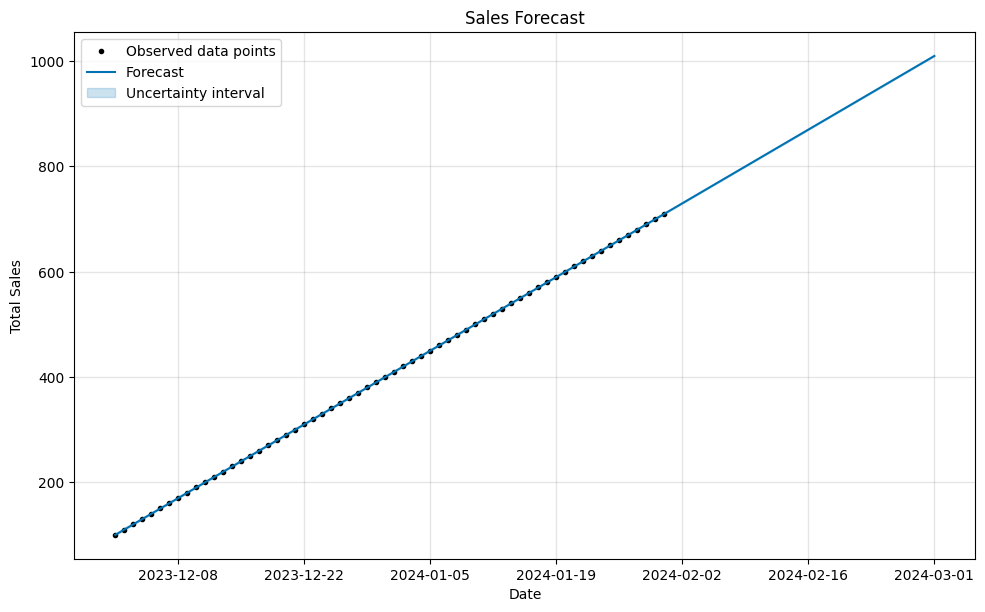

In [84]:
# Initialize the forecaster with the combined dataset
forecaster = CombinedSalesForecaster(data_path='COMBINED_MASTERDATA.csv',
                                     start_date='2023-01-01',
                                     end_date='2024-12-12',
                                     )

# Load and preprocess the data
forecaster.load_data()
forecaster.preprocess_data()

# Fit the model
forecaster.fit_model()

# Make predictions
forecaster.make_predictions()

# Plot the forecast
forecaster.plot_forecast()

# Save the pipeline
forecaster.save_pipeline('combined_sales_forecaster.joblib')


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3zjphnsj/uy382y6c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3zjphnsj/o1cg78og.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60771', 'data', 'file=/tmp/tmp3zjphnsj/uy382y6c.json', 'init=/tmp/tmp3zjphnsj/o1cg78og.json', 'output', 'file=/tmp/tmp3zjphnsj/prophet_model9fqawzkm/prophet_model-20241019230535.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:05:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:05:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


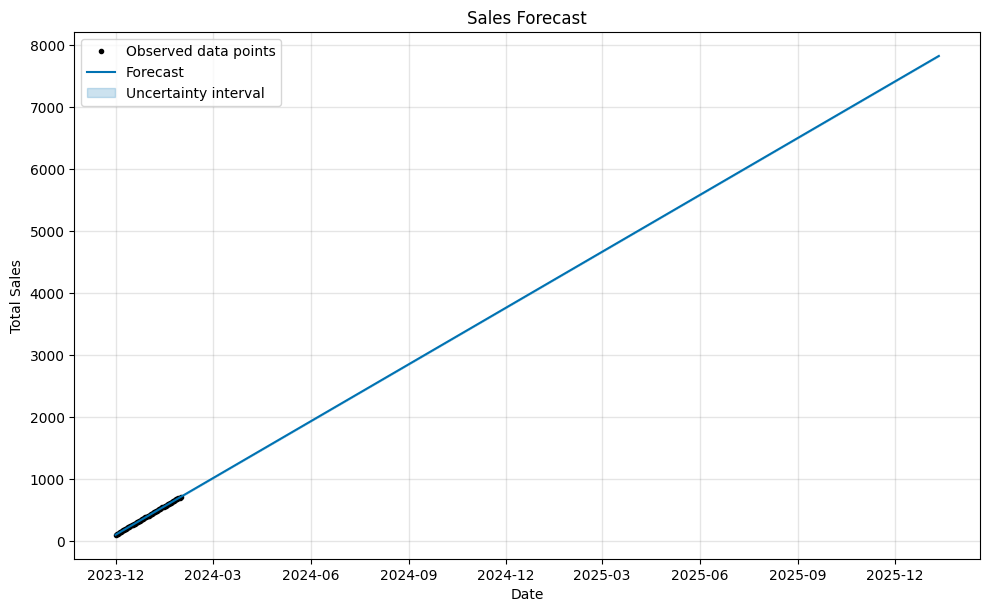

In [85]:
# Initialize the forecaster with the combined dataset
loaded_forecaster = CombinedSalesForecaster(data_path='COMBINED_MASTERDATA.csv',
                                             start_date='2023-01-01',
                                             end_date='2024-12-12')

# Load and preprocess the data
loaded_forecaster.load_data()
loaded_forecaster.preprocess_data()

# Fit the model
loaded_forecaster.fit_model()

# Generate forecast after loading
loaded_forecaster.generate_forecast_after_load()

# Plot the forecast
loaded_forecaster.plot_forecast()



In [33]:
import pandas as pd
from prophet import Prophet
import joblib
import matplotlib.pyplot as plt

class KOTForecaster:
    def __init__(self, data):
        self.data = data
        self.model = None

    @classmethod
    def load_data(cls, filepath):
        # Load the KOT data from CSV
        data = pd.read_csv(filepath)
        # Ensure the 'Punch_Time' column is a datetime type
        data['Punch_Time_k'] = pd.to_datetime(data['Punch_Time_k'])
        return cls(data)

    def prepare_data(self):
        # Group the data by date to count the total KOTs
        daily_kots = self.data.groupby(self.data['Punch_Time_k'].dt.date).size().reset_index(name='y')
        daily_kots.rename(columns={'Punch_Time_k': 'ds'}, inplace=True)
        return daily_kots

    def fit(self):
        daily_kots = self.prepare_data()
        self.model = Prophet()
        self.model.fit(daily_kots)

    def predict(self, periods):
        future = self.model.make_future_dataframe(periods=periods)
        forecast = self.model.predict(future)
        return forecast

    def plot_forecast(self, forecast):
        fig = self.model.plot(forecast)
        plt.title("KOT Forecast")
        plt.xlabel("Date")
        plt.ylabel("Number of KOTs")
        plt.show()

    def save_pipeline(self, filename):
        joblib.dump(self.model, filename)

    @classmethod
    def load_pipeline(cls, filename):
        model = joblib.load(filename)
        instance = cls(pd.DataFrame())  # Dummy DataFrame as we don't need it
        instance.model = model
        return instance


<ipython-input-33-ab6ad1e5b530>:14: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filepath)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3zjphnsj/702dlqi5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3zjphnsj/pnchmud3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62646', 'data', 'file=/tmp/tmp3zjphnsj/702dlqi5.json', 'init=/tmp/tmp3zjphnsj/pnchmud3.json', 'output', 'file=/tmp/tmp3zjphnsj/prophet_modelfrf7oy10/prophet_model-20241019213416.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:34:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstan

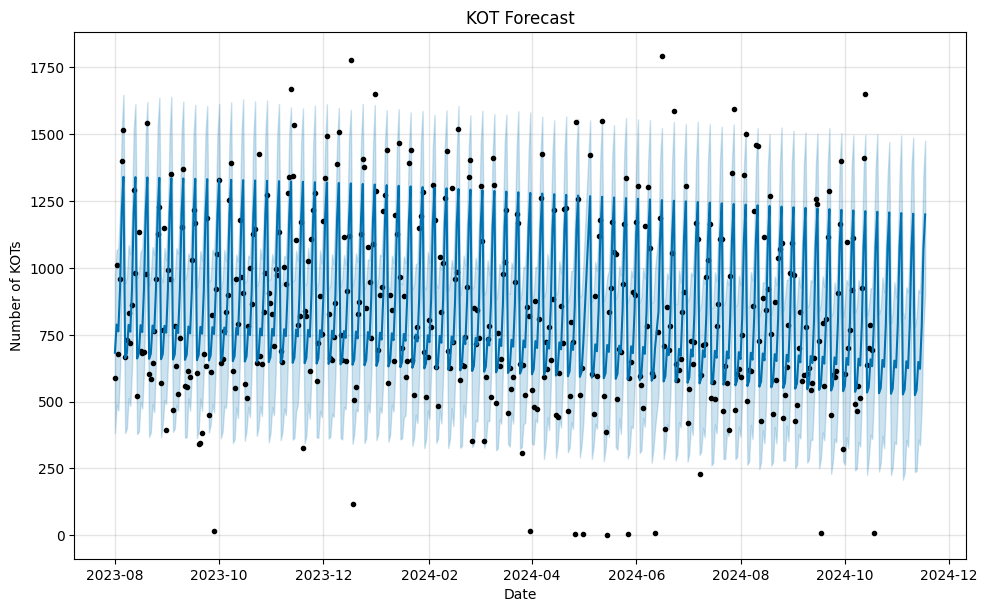

In [34]:
# Load your KOT dataset
kot_forecaster = KOTForecaster.load_data('MERGED_KOT_DATA.csv')  # Update the path

# Fit the model
kot_forecaster.fit()

# Make predictions for the next 30 days
forecast = kot_forecaster.predict(periods=30)

# Plot the forecast
kot_forecaster.plot_forecast(forecast)

# Save the pipeline
kot_forecaster.save_pipeline('kot_forecaster.joblib')


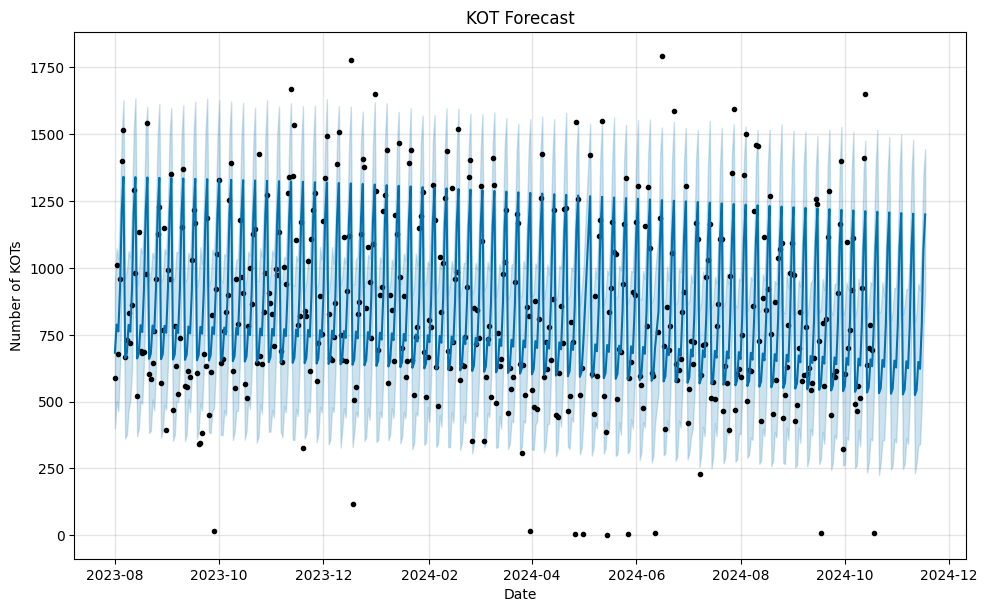

In [35]:
# Test the KOT Forecaster
loaded_kot_forecaster = KOTForecaster.load_pipeline('kot_forecaster.joblib')
kot_forecast = loaded_kot_forecaster.predict(periods=30)  # Make predictions after loading
loaded_kot_forecaster.plot_forecast(kot_forecast)  # Plot the forecast from the loaded model


In [86]:
pip install prophet h5py


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3zjphnsj/qzenu98w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3zjphnsj/cmq7caet.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15487', 'data', 'file=/tmp/tmp3zjphnsj/qzenu98w.json', 'init=/tmp/tmp3zjphnsj/cmq7caet.json', 'output', 'file=/tmp/tmp3zjphnsj/prophet_modeliwyqkwfz/prophet_model-20241019235820.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:58:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:58:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


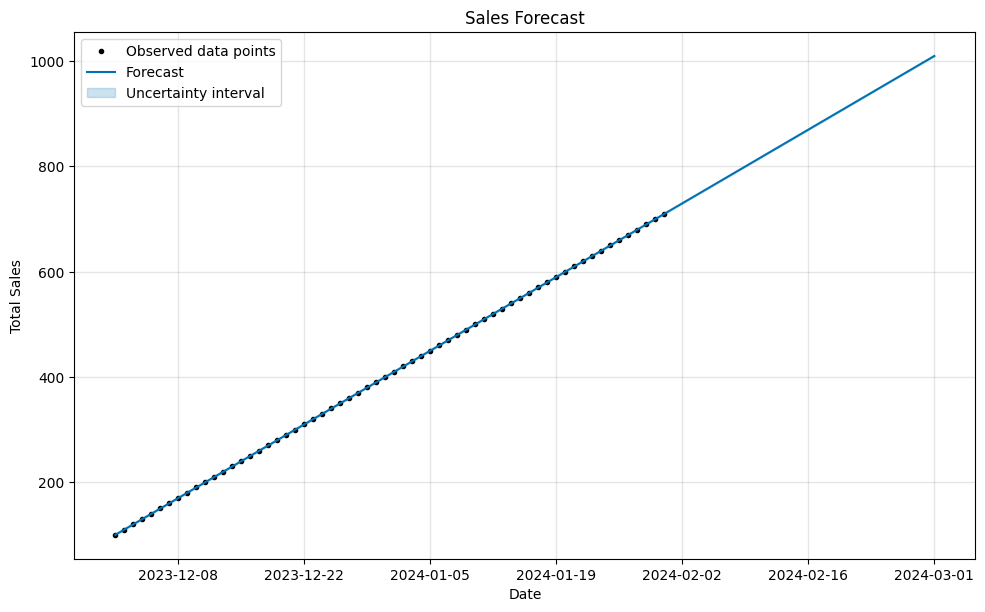

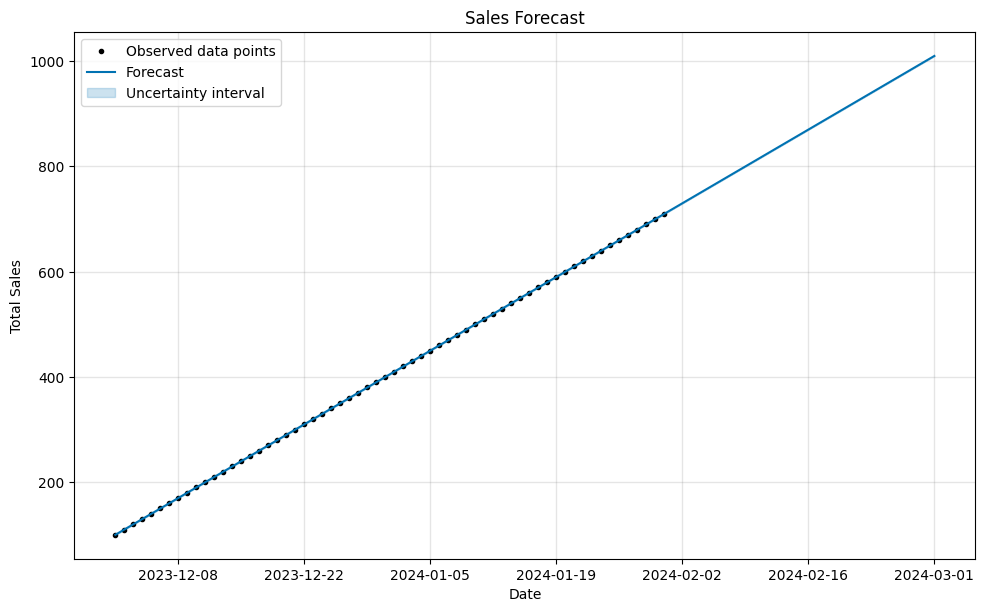

In [102]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from joblib import dump, load

class CombinedSalesForecaster:
    def __init__(self, data_path):
        self.data_path = data_path
        self.model = None
        self.daily_sales = None
        self.forecast = None

    def load_data(self):
        # Load your dataset
        data = pd.read_csv(self.data_path)
        # Ensure the 'Date' column is a datetime type
        data['Date'] = pd.to_datetime(data['Date'])
        # Group the data by date to sum the total costs
        self.daily_sales = data.groupby(data['Date'].dt.date).agg({'Total': 'sum'}).reset_index()
        # Rename the columns for Prophet
        self.daily_sales.rename(columns={'Date': 'ds', 'Total': 'y'}, inplace=True)

    def fit_model(self):
        # Initialize and fit the Prophet model
        self.model = Prophet()
        self.model.fit(self.daily_sales)

    def make_predictions(self, periods=30):
        # Create a DataFrame to hold future predictions
        future = self.model.make_future_dataframe(periods=periods)  # Predict for the next 'periods' days
        # Make predictions
        self.forecast = self.model.predict(future)

    def plot_forecast(self):
        # Plot the forecast
        if self.forecast is not None:
            fig = self.model.plot(self.forecast)
            plt.title("Sales Forecast")
            plt.legend()
            plt.xlabel("Date")
            plt.ylabel("Total Sales")
            plt.show()
        else:
            print("No forecast available. Please run make_predictions() first.")

    def save_model(self, filename='combined_sales_model.joblib'):
        # Save the Prophet model
        dump(self.model, filename)

    @classmethod
    def load_model(cls, filename='combined_sales_model.joblib'):
        # Load the Prophet model
        model = load(filename)
        obj = cls(data_path=None)  # Create an instance without a data path
        obj.model = model
        return obj

# Example usage
if __name__ == "__main__":
    forecaster = CombinedSalesForecaster(data_path='COMBINED_MASTERDATA.csv')

    # Load data
    forecaster.load_data()

    # Fit the model
    forecaster.fit_model()

    # Make predictions
    forecaster.make_predictions(periods=30)

    # Plot the forecast
    forecaster.plot_forecast()

    # Save the model
    forecaster.save_model('combined_sales_model.joblib')

    # Load the model later if needed
    loaded_forecaster = CombinedSalesForecaster.load_model('combined_sales_model.joblib')

    # Use the loaded model for predictions or further analysis
    loaded_forecaster.make_predictions(periods=30)  # You can adjust the period as needed
    loaded_forecaster.plot_forecast()  # To visualize the forecast


In [104]:
from joblib import dump, load

def add_regressors(self):
    # Ensure the 'ds' column is in datetime format
    if not pd.api.types.is_datetime64_any_dtype(self.daily_sales['ds']):
        self.daily_sales['ds'] = pd.to_datetime(self.daily_sales['ds'])

    # Create additional features (regressors)
    self.daily_sales['day_of_week'] = self.daily_sales['ds'].dt.dayofweek
    self.daily_sales['is_weekend'] = (self.daily_sales['day_of_week'] >= 5).astype(int)

    # You can also include holiday information or other relevant features



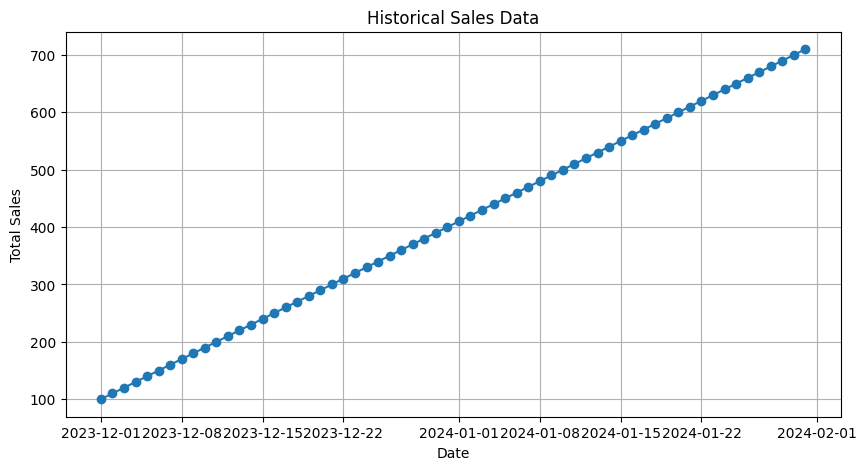

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3zjphnsj/8p8fawjf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3zjphnsj/dohah67l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25387', 'data', 'file=/tmp/tmp3zjphnsj/8p8fawjf.json', 'init=/tmp/tmp3zjphnsj/dohah67l.json', 'output', 'file=/tmp/tmp3zjphnsj/prophet_modelav8kw5mp/prophet_model-20241020025057.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:50:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:51:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


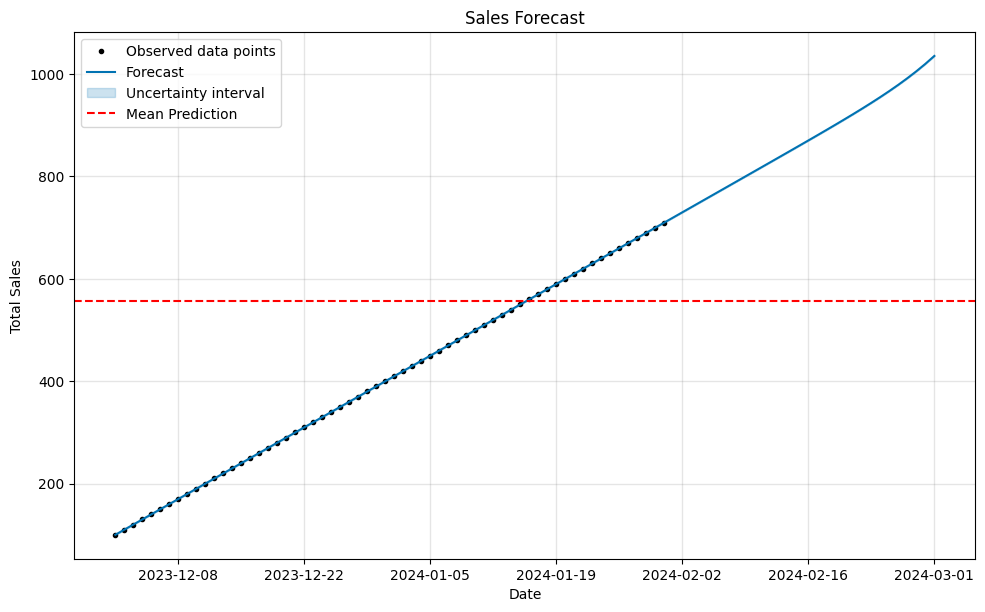

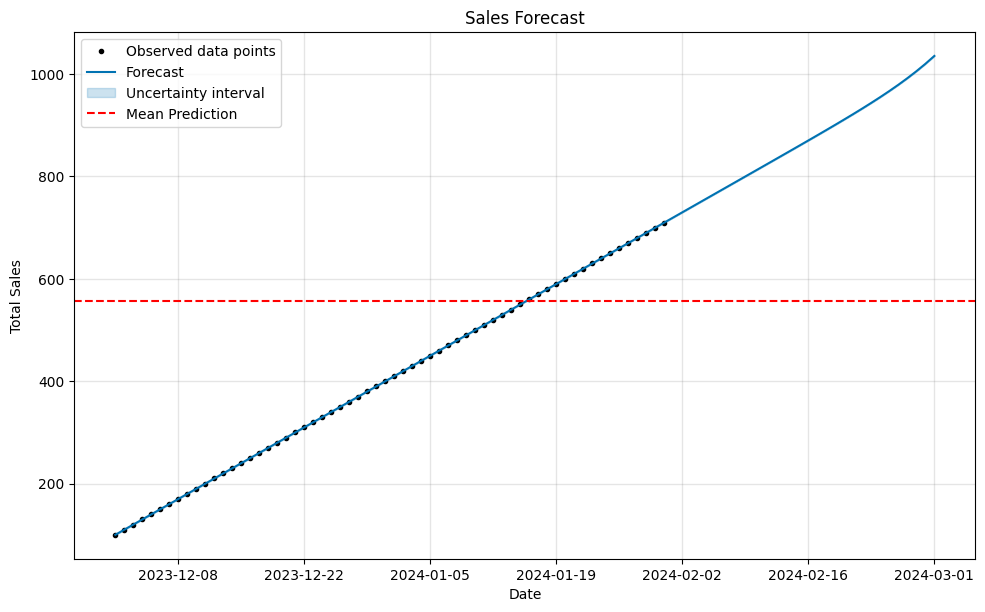

In [122]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from joblib import dump, load

class CombinedSalesForecaster:
    def __init__(self, data_path):
        self.data_path = data_path
        self.model = None
        self.daily_sales = None
        self.forecast = None

    def load_data(self):
        # Load your dataset
        data = pd.read_csv(self.data_path)
        # Ensure the 'Date' column is a datetime type
        data['Date'] = pd.to_datetime(data['Date'])
        # Group the data by date to sum the total costs
        self.daily_sales = data.groupby(data['Date'].dt.date).agg({'Total': 'sum'}).reset_index()
        # Rename the columns for Prophet
        self.daily_sales.rename(columns={'Date': 'ds', 'Total': 'y'}, inplace=True)

    def add_regressors(self):
        # Ensure the 'ds' column is in datetime format
        if not pd.api.types.is_datetime64_any_dtype(self.daily_sales['ds']):
            self.daily_sales['ds'] = pd.to_datetime(self.daily_sales['ds'])

        # Create additional features (regressors)
        self.daily_sales['day_of_week'] = self.daily_sales['ds'].dt.dayofweek
        self.daily_sales['is_weekend'] = (self.daily_sales['day_of_week'] >= 5).astype(int)

        # You can also include holiday information or other relevant features

    def fit_model(self):
        # Initialize and fit the Prophet model with custom seasonality
        self.model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)

        # Add regressors to the model if any
        self.model.add_regressor('day_of_week')
        self.model.add_regressor('is_weekend')

        self.model.fit(self.daily_sales)

    def make_predictions(self, periods=30):
        # Create a DataFrame to hold future predictions
        future = self.model.make_future_dataframe(periods=periods)  # Predict for the next 'periods' days

        # Add regressors to the future DataFrame
        future['day_of_week'] = future['ds'].dt.dayofweek
        future['is_weekend'] = (future['day_of_week'] >= 5).astype(int)

        # Make predictions
        self.forecast = self.model.predict(future)

    def plot_forecast(self):
      # Plot the forecast
      if self.forecast is not None:
          fig = self.model.plot(self.forecast)
          plt.title("Sales Forecast")
          plt.xlabel("Date")
          plt.ylabel("Total Sales")

          # Adding mean line based on predicted values
          plt.axhline(y=self.forecast['yhat'].mean(), color='red', linestyle='--', label='Mean Prediction')

          # Adding legend
          plt.legend()

          # Show the plot
          plt.show()
      else:
        print("No forecast available. Please run make_predictions() first.")


    def save_model(self, filename='combined_sales_model.joblib'):
        # Save the Prophet model
        dump(self.model, filename)

    @classmethod
    def load_model(cls, filename='combined_sales_model.joblib'):
        # Load the Prophet model
        model = load(filename)
        obj = cls(data_path=None)  # Create an instance without a data path
        obj.model = model
        return obj

    def plot_historical_data(self):
        plt.figure(figsize=(10, 5))
        plt.plot(self.daily_sales['ds'], self.daily_sales['y'], marker='o')
        plt.title('Historical Sales Data')
        plt.xlabel('Date')
        plt.ylabel('Total Sales')
        plt.grid()
        plt.show()


# Example usage
if __name__ == "__main__":
    forecaster = CombinedSalesForecaster(data_path='COMBINED_MASTERDATA.csv')

    # Load data
    forecaster.load_data()

    # Add regressors
    forecaster.add_regressors()

    # Fit the model
    forecaster.plot_historical_data()
    forecaster.fit_model()

    # Make predictions
    forecaster.make_predictions(periods=30)

    # Plot the forecast
    forecaster.plot_forecast()

    # Save the model
    forecaster.save_model('combined_sales_model.joblib')

    # Load the model later if needed
    loaded_forecaster = CombinedSalesForecaster.load_model('combined_sales_model.joblib')

    # Use the loaded model for predictions or further analysis
    loaded_forecaster.make_predictions(periods=30)  # You can adjust the period as needed
    loaded_forecaster.plot_forecast()  # To visualize the forecast


In [134]:
data = pd.read_csv('COMBINED_MASTERDATA.csv')
data.head()

,Date,Invoice_Date,Aggregator_Order_No,PoS_Invoice_No,Order_From,Order_Type,Customer_Name,Payment_Type,Deliverytatus,Status,...,Client_Sharing_Code,Order_ID,Order_Status,Received_Time,Accepted_Time,Mark_Ready_Time,Rider_Arrival_Time,Picked_up_Time,Delivered_Time,Delivery_status
0,2024-01-22 22:29:00+00:00,22-01-2024,1.649120e+14,13809,Swiggy,Delivery,SWIGGY,Online,Swiggy - Mohd Sameer Shaikh ( 8286442199 ),Delivered,...,5ojxvbyp,1.649120e+14,Delivered,2024-01-22 22:29:00+00:00,2024-01-22 22:29:00+00:00,2024-01-22 22:42:00+00:00,2024-01-22 22:57:00+00:00,2024-01-22 23:01:00+00:00,2024-01-22 23:19:00+00:00,NaN
1,2023-12-25 13:32:00+00:00,25-12-2023,1.624610e+14,11890,Swiggy,Delivery,SWIGGY,Online,Swiggy - Sonu Kamat ( 8709563655 ),Delivered,...,5ojxvbyp,1.624610e+14,Delivered,2023-12-25 13:32:00+00:00,2023-12-25 13:32:00+00:00,2023-12-25 13:47:00+00:00,2023-12-25 13:54:00+00:00,2023-12-25 13:57:00+00:00,2023-12-25 14:07:00+00:00,NaN
2,2024-01-28 20:47:00+00:00,28-01-2024,1.654250e+14,14169,Swiggy,Delivery,SWIGGY,Online,Swiggy - Govind Kamti ( 9892370531 ),Delivered,...,5ojxvbyp,1.654250e+14,Delivered,2024-01-28 20:47:00+00:00,2024-01-28 20:47:00+00:00,2024-01-28 21:02:00+00:00,2024-01-28 21:03:00+00:00,2024-01-28 21:05:00+00:00,2024-01-28 21:14:00+00:00,NaN
3,2023-12-23 20:25:00+00:00,23-12-2023,1.623130e+14,11738,Swiggy,Delivery,SWIGGY,Online,Swiggy,Cancelled,...,5ojxvbyp,1.623130e+14,Cancelled,2023-12-23 20:25:00+00:00,2023-12-23 20:25:00+00:00,2024-01-28 21:02:00+00:00,2024-01-28 21:03:00+00:00,2024-01-28 21:05:00+00:00,2024-01-28 21:14:00+00:00,NaN
4,2024-09-01 13:41:00+00:00,09-01-2024,1.637570e+14,12921,Swiggy,Delivery,SWIGGY,Online,Swiggy - Ravindra Kumar Kamat ( 8409536100 ),Delivered,...,5ojxvbyp,1.637570e+14,Delivered,2024-09-01 13:41:00+00:00,2024-09-01 13:41:00+00:00,2024-09-01 13:53:00+00:00,2024-09-01 13:55:00+00:00,2024-09-01 13:55:00+00:00,2024-09-01 14:01:00+00:00,NaN


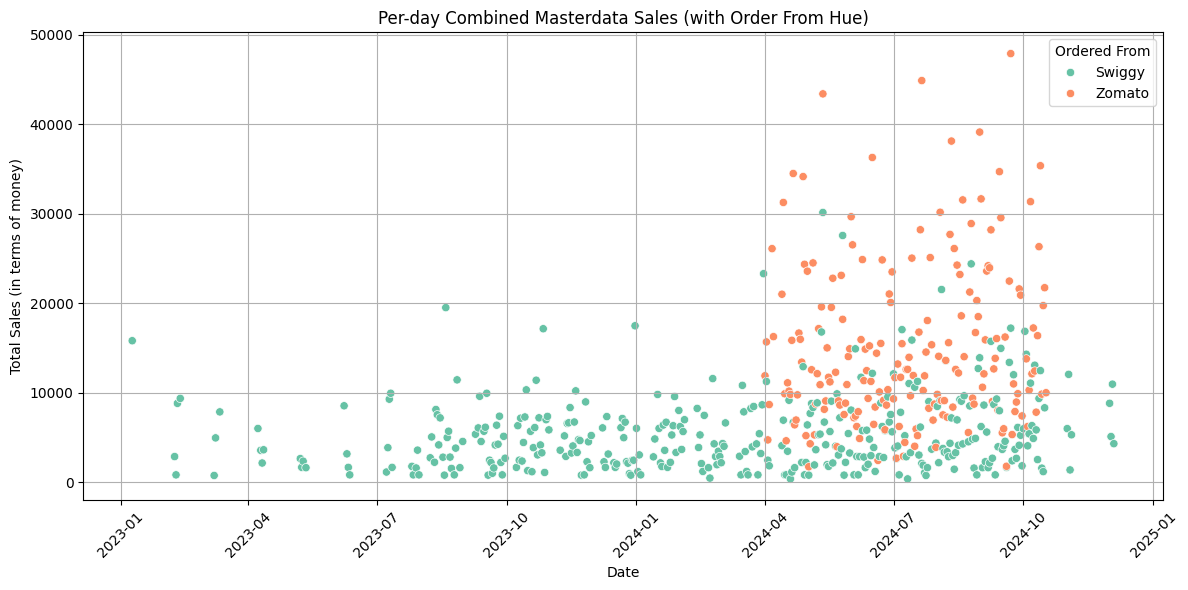

In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (ensure the 'Date' and 'Order_From' columns exist in your dataset)
data = pd.read_csv('COMBINED_MASTERDATA.csv')

# Ensure the 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Group the data by 'Date' to get daily sales and retain 'Order_From' for each record
daily_sales = data.groupby([data['Date'].dt.date, 'Order_From']).agg({'Total': 'sum'}).reset_index()

# Rename columns for clarity
daily_sales.rename(columns={'Date': 'ds', 'Total': 'y'}, inplace=True)

# Plot using seaborn with 'Order_From' as the hue
plt.figure(figsize=(12, 6))
sns.scatterplot(x='ds', y='y', hue='Order_From', data=daily_sales, palette='Set2')

# Add titles and labels
plt.title('Per-day Combined Masterdata Sales (with Order From Hue)')
plt.xlabel('Date')
plt.ylabel('Total Sales (in terms of money)')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend(title='Ordered From')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
